# 💼 Dự Án Phân Tích Hành Vi Khách Hàng Trong Bán Lẻ Trực Tuyến

## 📝 Tổng Quan

Dự án này tập trung vào phân tích dữ liệu trong lĩnh vực **bán lẻ trực tuyến** – một trong những ngành phát triển nhanh nhất hiện nay.  
Dữ liệu được cung cấp bởi **UCI Machine Learning Repository**, ghi lại toàn bộ các giao dịch của một nhà bán lẻ tại **Vương quốc Anh** từ năm **2010 đến 2011**.

---

## 🎯 Mục Tiêu Dự Án

- ✅ Thực hiện thử nghiệm phân khúc khách hàng bằng K-Means 

---

## ⚙️ Phương Pháp Triển Khai

- 📌 Làm sạch và xử lý dữ liệu giao dịch  
- 📌 Chuyển đổi dữ liệu giao dịch thành dữ liệu **tập trung vào khách hàng**  
- 📌 Tạo đặc trưng mới (*Feature Engineering*) giúp hiểu hành vi mua hàng  
- 📌 Áp dụng thuật toán **K-means Clustering** để phân nhóm khách hàng  

---

## 💡 Lợi Ích Từ Việc Phân Khúc

- 🎯 Hiểu rõ **đặc điểm & hành vi** của từng nhóm khách hàng  


# 🎯 MỤC TIÊU

## 🧹 Làm sạch và chuyển đổi dữ liệu
- Làm sạch tập dữ liệu bằng cách xử lý các:
  - ✅ Giá trị thiếu  
  - ✅ Dữ liệu trùng lặp  
  - ✅ Ngoại lệ (outliers)  
- Mục tiêu: Chuẩn bị dữ liệu cho quá trình phân cụm hiệu quả.

## 🛠️ Xây dựng đặc trưng (Feature Engineering)
- Phát triển các đặc trưng mới dựa trên dữ liệu giao dịch.
- Tạo ra tập dữ liệu lấy **khách hàng làm trung tâm**, làm nền tảng cho việc phân khúc khách hàng.

## ⚙️ Tiền xử lý dữ liệu
- Thực hiện:
  - 🔄 Chuẩn hóa đặc trưng (Feature Scaling)
- Mục tiêu: Đơn giản hóa và tăng hiệu quả phân cụm.

## 🧩 Phân khúc khách hàng bằng K-Means Clustering
- Áp dụng thuật toán **K-means** để phân nhóm khách hàng thành các cụm riêng biệt.

# Step 1 | Setup and Initialization

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

C:\Users\AORUS 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\AORUS 15\.cache\kagglehub\datasets\carrie1\ecommerce-data\versions\1


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import plotly.graph_objects as go
# from matplotlib.colors import LinearSegmentedColormap
# from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
# from tabulate import tabulate
# from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

In [3]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
# Configure Seaborn plot styles: Set background color and use white
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='white')

# Step 2 | Loading the Dataset

In [5]:
df = pd.read_csv(r"data.csv",encoding="ISO-8859-1")


## Mô tả dữ liệu (Dataset Description)

| Biến         | Ý nghĩa chi tiết                                                                                   |
|--------------|----------------------------------------------------------------------------------------------------|
| InvoiceNo    | Mã hóa đơn cho mỗi giao dịch. Nếu bắt đầu bằng chữ C (ví dụ: C123456), đó là hóa đơn hủy           |
| StockCode    | Mã sản phẩm – định danh duy nhất cho từng loại sản phẩm                                            |
| Description  | Mô tả tên sản phẩm – có thể chứa lỗi chính tả hoặc bị thiếu nếu dữ liệu không sạch                  |
| Quantity     | Số lượng sản phẩm được mua trong giao dịch. Có thể âm nếu là hoàn trả                              |
| InvoiceDate  | Ngày giờ thực hiện giao dịch – dùng để phân tích theo thời gian, mùa vụ                            |
| UnitPrice    | Giá của một đơn vị sản phẩm (tính theo bảng Anh – GBP)                                              |
| CustomerID   | ID của khách hàng – giúp phân tích hành vi từng người, nhưng có thể bị thiếu (NaN)                 |
| Country      | Quốc gia của khách hàng – có thể dùng cho phân tích theo khu vực, thị trường                        |

# Step 3 | Initial Data Analysis

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Mô tả Dataset

Bộ dữ liệu này bao gồm **8 cột** và **541.909 dòng** dữ liệu.

| Cột          | Kiểu dữ liệu   | Mô tả chi tiết                                                                                                 |
|--------------|----------------|---------------------------------------------------------------------------------------------------------------|
| InvoiceNo    | object (chuỗi) | Số hóa đơn cho mỗi giao dịch. Một hóa đơn có thể chứa nhiều sản phẩm khác nhau.                               |
| StockCode    | object (chuỗi) | Mã sản phẩm của từng mặt hàng.                                                                                |
| Description  | object (chuỗi) | Mô tả sản phẩm. Có giá trị thiếu: chỉ có **540.455** dòng hợp lệ trên **541.909** dòng.                       |
| Quantity     | int            | Số lượng mặt hàng được mua trong mỗi giao dịch.                                                               |
| InvoiceDate  | datetime       | Ngày giờ thực hiện giao dịch.                                                                                 |
| UnitPrice    | float          | Đơn giá của từng sản phẩm.                                                                                    |
| CustomerID   | float          | Mã định danh khách hàng. Có nhiều giá trị bị thiếu: chỉ có **406.829** dòng hợp lệ trên **541.909** dòng.    |
| Country      | object (chuỗi) | Quốc gia nơi diễn ra mỗi giao dịch.                                                                            |

---

### Nhận định ban đầu:

- Có **giá trị thiếu** trong cột **Description** và **CustomerID**, cần được xử lý khi làm sạch dữ liệu.
- Cột **InvoiceDate** đã ở định dạng `datetime`, thuận tiện cho phân tích chuỗi thời gian.
- Một khách hàng có thể có nhiều giao dịch khác nhau, được xác định bằng việc lặp lại **CustomerID** trong nhiều dòng.


I will go deeper to understand insight of dataset

In [8]:
df.describe().T
#dùng describe để thống kê các cột số. T là để các mean,25% thành hàng ngang

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
df.describe(include='object').T
# dùng thống kể các cột object. T là để các unique, top thành hàng ngang

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


## Kết luận Phân tích Sơ bộ (Preliminary Data Analysis)

### Quantity
- Trung bình: **9.55** sản phẩm/giao dịch.
- Có giá trị âm (trả hàng, hoàn đơn) – cần xử lý.
- Khoảng giá trị: **-80,995** đến **80,995**.
- Dữ liệu phân tán mạnh (standard deviation lớn), có outliers → cần xử lý.
  
---

### UnitPrice
- Trung bình: **4.61** GBP/sản phẩm.
- Có giá trị âm và rất cao (từ **-11,062.06** đến **38,970**) → nghi ngờ lỗi nhập liệu → cần kiểm tra.
- Phân phối lệch, có outliers lớn.

---

### CustomerID
- Có **406,829** dòng hợp lệ trên **541,909** → nhiều giá trị thiếu → cần xử lý.
- Khoảng giá trị ID: **12,346** đến **18,287**.
- Dùng để phân tích hành vi khách hàng.

---

### InvoiceNo
- Có **25,900** mã hóa đơn khác nhau → đại diện cho **25,900 giao dịch**.
- Mã hóa đơn xuất hiện nhiều nhất: **573585** (lặp lại **1,114** lần) → khả năng là đơn hàng lớn hoặc nhiều mặt hàng trong 1 giao dịch.

---

### StockCode
- Có **4,070** mã sản phẩm khác nhau.
- Mã sản phẩm phổ biến nhất: **85123A** (xuất hiện **2,313** lần).

---

### Description
- Có **4,223** mô tả sản phẩm khác nhau.
- Mô tả phổ biến nhất: **"WHITE HANGING HEART T-LIGHT HOLDER"** (xuất hiện **2,369** lần).
- Có một số giá trị thiếu → cần xử lý khi làm sạch dữ liệu.

---

### Country
- Gồm **38** quốc gia.
- ~**91.4%** giao dịch đến từ **United Kingdom** → thị trường chính.

---

👉 **Tóm lại:**
- Cần làm sạch dữ liệu: loại bỏ/điều chỉnh giá trị âm, xử lý missing values.
- Cẩn thận với outliers ở cột **Quantity** và **UnitPrice**.
- Khai thác thêm phân tích theo **quốc gia**, **khách hàng**, **mã hóa đơn**.


# Step 4 | Data Cleaning & Transformation

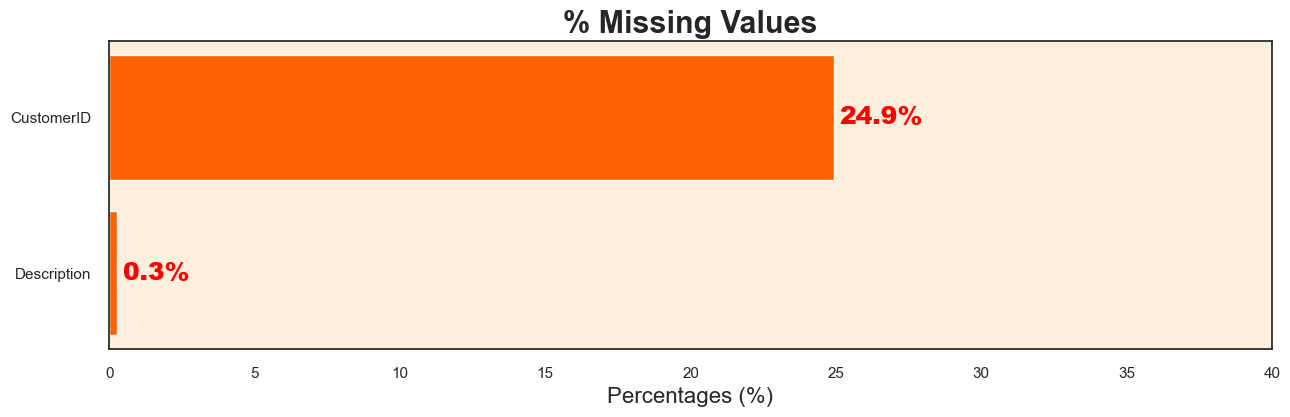

In [10]:
#Handling Missing Values
#tính % của missing values cho mỗi cột
missing_values = df.isnull().sum()
percentage_missing = (missing_values[missing_values>0]/df.shape[0])*100
#sort values
percentage_missing.sort_values(ascending = True , inplace = True)
#vẽ chart để dễ nhìn có bao nhiêu % missing value
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(percentage_missing.index, percentage_missing, color='#ff6200')
#hiển thị các giá trị và chỉ số
for i, (value, name) in enumerate(zip(percentage_missing, percentage_missing.index)):
    ax.text(value + 0.2, i, f"{value:.1f}%", ha='left', va='center', fontweight='black', fontsize=18, color='red')
#set limit
ax.set_xlim([0, 40])

#add title cho chart
plt.title("% Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

## 📌 Chiến lược Xử lý Giá trị Thiếu (Handling Missing Values Strategy) - Sau Kiểm Tra

### CustomerID (thiếu ~24.9%)
- Cột **CustomerID** rất quan trọng, đặc biệt trong phân tích phân khúc khách hàng (**customer segmentation**).
- Tuy nhiên, sau khi kiểm tra và cân nhắc, **toàn bộ các dòng bị thiếu CustomerID sẽ được loại bỏ** (`dropna`).
- **Lý do**: Dữ liệu không đầy đủ sẽ ảnh hưởng đến phân tích, và việc gán giả mạo ID có thể dẫn đến sai lệch kết quả.

### Description (thiếu ~0.3%)
- Dù tỷ lệ thiếu thấp (**0.3%**), để đảm bảo tính toàn vẹn dữ liệu, **toàn bộ các dòng thiếu Description cũng được loại bỏ**.
- Ngoài ra, phát hiện **sự không nhất quán giữa StockCode và Description** (cùng mã hàng nhưng mô tả khác nhau) vẫn cần được xử lý ở các bước sau: chuẩn hóa tên sản phẩm, kiểm tra chất lượng dữ liệu.

---

👉 **Tóm lại:**
- Loại bỏ hoàn toàn các dòng dữ liệu bị thiếu ở CustomerID và Description để đảm bảo chất lượng và tính toàn vẹn dữ liệu cho các phân tích tiếp theo.


In [11]:
#Trích xuất những dữ liệu bị thiếu CustomerID hoặc Description
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [12]:
#Xóa những dữ liệu của CustomerID và Description
df = df.dropna(subset=['CustomerID', 'Description'])
#Kiểm tra
df.isnull().sum().sum()


np.int64(0)

# Step 5 | Handling Duplicates

In [13]:
# tìm các value duplicate
duplicate_rows = df[df.duplicated(keep=False)] #keep =false Tìm tất cả các bản ghi trùng (kể cả bản gốc)

# sắp xếp lại data
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo','StockCode','Description','CustomerID','Quantity'])

duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [14]:
df.duplicated().sum()

np.int64(5225)

In [15]:
#xóa trực tiếp value duplicates trên df k cần gán lại
df.drop_duplicates(inplace=True)

In [16]:
#đếm số dòng sau khi xóa
df.shape[0]

401604

# Step 6 | Treating Cancelled Transactions

## Phân tích Giao dịch Bị Hủy (Cancelled Transactions Analysis)

Để hiểu rõ hơn về **hành vi và sở thích của khách hàng**, chúng ta cần xem xét đến các **giao dịch đã bị hủy**.

- **Bước 1**: Xác định các giao dịch bị hủy bằng cách lọc những dòng mà cột **InvoiceNo** bắt đầu bằng chữ **"C"**.
- **Bước 2**: Phân tích các giao dịch bị hủy để tìm ra **các đặc điểm hoặc xu hướng chung**.

👉 Việc phân tích này giúp khám phá các **mẫu hành vi phổ biến** hoặc **lý do tiềm ẩn dẫn đến việc hủy đơn**, từ đó giúp cải thiện **trải nghiệm khách hàng** và **quản lý rủi ro** tốt hơn.


In [17]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1).round(2)

,Quantity,UnitPrice
count,8872.00,8872.00
mean,-30.77,18.90
std,1172.25,445.19
min,-80995.00,0.01
25%,-6.00,1.45
50%,-2.00,2.95
75%,-1.00,4.95
max,-1.00,38970.00


## Thống kê Giao dịch Bị Hủy (Cancelled Transactions Statistics)

| Thông số         | Quantity (Số lượng trả)            | UnitPrice (Đơn giá sản phẩm)             |
|------------------|-----------------------------------|------------------------------------------|
| **Số dòng**      | 8,872 giao dịch                   | 8,872 sản phẩm                           |
| **Trung bình**   | -30.77 sản phẩm                   | £18.90                                   |
| **Độ lệch chuẩn** | 1,172.25 (phân tán lớn)           | 445.19 (nhiều sản phẩm giá cao)          |
| **Giá trị nhỏ nhất** | -80,995 sản phẩm                 | £0.01 (rất rẻ)                            |
| **25% thấp nhất** | -6 sản phẩm                       | £1.45                                    |
| **Trung vị (50%)** | -2 sản phẩm                       | £2.95                                    |
| **75% cao nhất** | -1 sản phẩm                       | £4.95                                    |
| **Lớn nhất**     | -1 sản phẩm                       | £38,970 (rất đắt)                         |

---

👉 **Nhận xét nhanh:**
- Cột **Quantity** có giá trị âm lớn (đặc trưng của giao dịch hoàn trả), phân tán mạnh.
- **UnitPrice** có khoảng giá rất rộng, từ giá rất rẻ (**£0.01**) đến rất cao (**£38,970**), cần xem xét các sản phẩm có giá bất thường.



## Nhận xét về Giao dịch Bị Hủy

- Tất cả các giá trị **Quantity** trong các giao dịch bị hủy đều là **số âm**, cho thấy đây thực sự là các **đơn hàng đã bị hủy hoặc hoàn trả**.

- Cột **UnitPrice** có **mức độ phân tán lớn**, cho thấy rằng các giao dịch bị hủy bao gồm **nhiều loại sản phẩm** — từ **giá thấp** đến **giá cao**.


## Chiến lược Xử lý Các Giao dịch Bị Hủy

Xét đến mục tiêu của dự án là **phân cụm khách hàng** dựa trên **hành vi và sở thích mua sắm**, đồng thời tiến tới xây dựng **hệ thống gợi ý sản phẩm**, việc **hiểu rõ xu hướng hủy đơn hàng** của khách hàng là **rất quan trọng**.

Do đó, **chiến lược** sẽ là:
- **Giữ lại** các giao dịch bị hủy trong tập dữ liệu.
- **Đánh dấu riêng biệt** các giao dịch này để phục vụ cho các phân tích sau này.

---

### Lợi ích của chiến lược:

- **Cải thiện quá trình phân cụm khách hàng**:  
  Nhờ đưa vào các xu hướng và mô hình xuất hiện trong dữ liệu hủy đơn, giúp phát hiện các **hành vi đặc trưng** của khách hàng.

- **Nâng cao chất lượng hệ thống gợi ý sản phẩm**:  
  Hệ thống có thể **tránh đề xuất các sản phẩm dễ bị hủy**, từ đó nâng cao độ chính xác và giá trị của các gợi ý dành cho khách hàng.


In [18]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


Kết luận: Tỉ lệ % hủy đơn là 2.21%. Là một tỷ lệ nhỏ trong toàn bộ dataset. Đồng nghĩa phần lớn giao dịch là 97.79% hoành thành và hợp lệ
=> Hệ thống hoạt động tốt và ổn định, ít xảy ra tình trạng hủy đơn

# Step 7 | Correcting StockCode Anomalies

In [19]:
# tìm kiếm giá trị duy nhất của Stockcode
unique_stock_codes = df['StockCode'].nunique()

print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


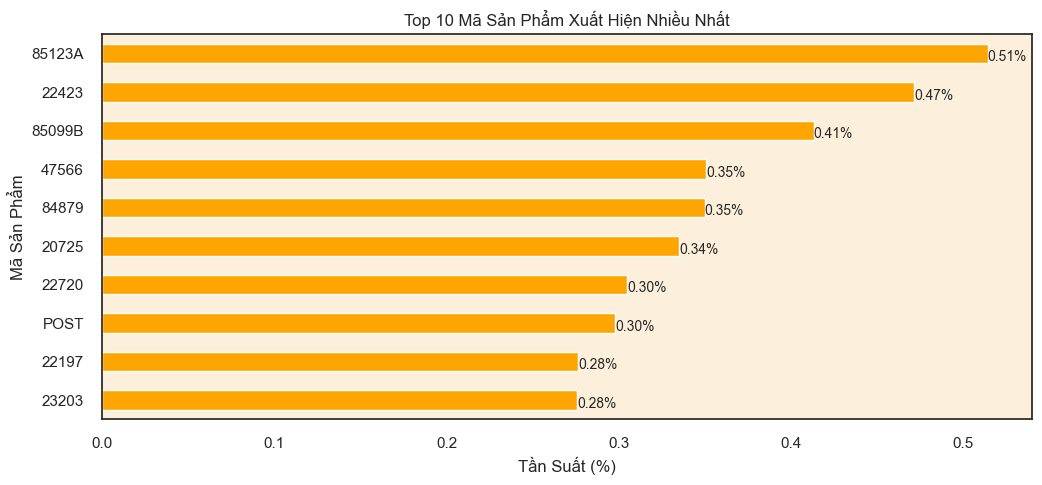

In [20]:
# Tìm 10 mã sản phẩm (StockCode) xuất hiện nhiều nhất 
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100 #normalize=True để tính tần suất phần trăm

# Vẽ biểu đồ ngang (bar chart) cho 10 mã sản phẩm xuất hiện nhiều nhất
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='orange')

# Thêm nhãn phần trăm tần suất trên các thanh biểu đồ
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.2, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Mã Sản Phẩm Xuất Hiện Nhiều Nhất')
plt.xlabel('Tần Suất (%)')
plt.ylabel('Mã Sản Phẩm')
plt.gca().invert_yaxis() #trục y đảo ngược để mã sản phẩm xuất hiện nhiều nhất ở trên cùng
plt.show()

## Phân tích Dữ liệu Sản phẩm

- Dataset chứa **3,684 mã sản phẩm duy nhất**, cho thấy cửa hàng bán lẻ này có **danh mục sản phẩm đa dạng**.  
  Điều này giúp **việc phân cụm khách hàng trở nên đa dạng và chi tiết hơn**, vì mỗi nhóm khách hàng thường có xu hướng yêu thích những loại sản phẩm riêng.

---

- Biểu đồ cho thấy **10 sản phẩm được mua nhiều nhất**, đại diện cho những **mã sản phẩm phổ biến** – tức là những sản phẩm mà khách hàng thường xuyên mua nhất.  
  Đây là **các sản phẩm cốt lõi** giúp phân loại hành vi mua sắm của khách hàng.

---

- Tuy nhiên, phần lớn các mã sản phẩm có từ **5 đến 6 ký tự**, nhưng tồn tại một số **ngoại lệ** như mã **'POST'**.  
  Những mã này **có thể đại diện cho dịch vụ** hoặc các giao dịch không phải sản phẩm (ví dụ: **phí vận chuyển**).

---

### Đề xuất xử lý:
- Để **giữ đúng trọng tâm của dự án** là **phân cụm khách hàng dựa trên sản phẩm đã mua** và **xây dựng hệ thống gợi ý sản phẩm**, cần:
  - **Kiểm tra và xử lý** các mã bất thường như `'POST'` để đảm bảo **tính toàn vẹn của dữ liệu**.
  - Xem xét **loại bỏ** hoặc **gắn nhãn riêng** các mã này để tránh ảnh hưởng tới kết quả phân cụm và đề xuất.


To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [21]:
# Tìm số lượng ký tự số trong mỗi mã sản phẩm duy nhất (StockCode)
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()
#sum(c.isdigit() for c in str(x)) sẽ đếm số ký tự số trong mỗi mã sản phẩm
print("Value counts of numeric character frequencies in unique stock codes:")
print("*-*"*22)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
5    3676
0       7
1       1
Name: count, dtype: int64


## Phân tích Định dạng Mã Sản phẩm

- **Phần lớn** các mã sản phẩm duy nhất (**3,676 trên 3,684**) có **chính xác 5 ký tự số**.  
  Đây dường như là **định dạng tiêu chuẩn** để biểu diễn mã sản phẩm trong tập dữ liệu này.

---

### Những ngoại lệ cần chú ý:
- **7 mã** không chứa **bất kỳ ký tự số nào**.
- **1 mã** chỉ chứa **duy nhất 1 ký tự số**.

---

👉 Những mã này **lệch khỏi định dạng chuẩn** và cần được kiểm tra kỹ lưỡng để:
- Hiểu rõ bản chất thực sự của chúng.
- Xác định xem đây có phải là **giao dịch sản phẩm hợp lệ** hay không, hay chỉ là **dịch vụ, phí, hoặc lỗi dữ liệu**.

---

### Tiếp theo:
- Xác định danh sách các mã sản phẩm có **0 hoặc 1 ký tự số** để phân tích chi tiết hơn.


In [22]:
# Tìm và in ra các mã sản phẩm có 0 hoặc 1 ký tự số
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


Let's calculate the percentage of records with these anomalous stock codes:

In [23]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


## Kết luận

Dựa trên phân tích, ta nhận thấy:

- Chỉ một **tỷ lệ rất nhỏ** của các bản ghi (**0.48%**) có mã sản phẩm **bất thường** – tức là những mã **không tuân theo định dạng chuẩn** được quan sát trong phần lớn dữ liệu.
- Cụ thể, các mã bất thường này chỉ chiếm **8 trên tổng số 3,684 mã sản phẩm duy nhất**.

---

### Đặc điểm của các mã bất thường:
- Dường như **không đại diện cho sản phẩm thực tế**.
- Có thể là các giao dịch phụ trợ như:
  - `"BANK CHARGES"` (phí ngân hàng)
  - `"POST"` (có thể là **phí vận chuyển**), v.v.

---

### Khuyến nghị:
- Vì các mã này **không phải sản phẩm thực** và chỉ chiếm **tỷ lệ rất nhỏ** trong toàn bộ dữ liệu, việc **giữ lại** trong phân tích có thể:
  - Gây nhiễu cho dữ liệu.
  - Làm **sai lệch kết quả phân cụm** khách hàng hoặc **làm giảm độ chính xác của hệ thống gợi ý**.

➡️ **Nên loại bỏ hoặc gắn nhãn riêng** các mã này để đảm bảo tính chính xác và chất lượng của phân tích.


## Chiến lược Xử lý Các Mã Sản phẩm Bất Thường

Xét trong **bối cảnh của dự án**, với mục tiêu là **phân cụm khách hàng dựa trên hành vi mua sản phẩm** và **xây dựng hệ thống gợi ý sản phẩm**, thì việc **loại bỏ các bản ghi có mã sản phẩm bất thường** là một lựa chọn **hợp lý và cần thiết**.

---

### Lý do:
- Giúp quá trình phân tích **tập trung hoàn toàn vào các giao dịch sản phẩm thực tế**.
- Loại bỏ các giao dịch không liên quan như:
  - `"POST"` (phí vận chuyển)
  - `"BANK CHARGES"` (phí ngân hàng)
  - Và các mã không tuân theo định dạng chuẩn.
- Đảm bảo kết quả phân tích và mô hình được xây dựng **chính xác, ý nghĩa và phản ánh đúng hành vi khách hàng**.

---

### Chiến lược thực hiện:
👉 **Lọc và loại bỏ** khỏi tập dữ liệu các dòng có **mã sản phẩm bất thường** trước khi thực hiện các bước phân tích sâu hơn và xây dựng mô hình.



In [24]:
# Loại bỏ những mã khác thường
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [25]:
# Lấy số dòng trong dataframe
df.shape[0]

399689

# Step 8 | Cleaning Description Column

## Kế hoạch Phân tích Mô tả Sản phẩm (Description)

Trước tiên, tôi sẽ **tính số lần xuất hiện** của từng **mô tả sản phẩm (Description)** trong tập dữ liệu.

Sau đó, tôi sẽ **vẽ biểu đồ** cho **30 mô tả xuất hiện nhiều nhất**.

Biểu đồ này sẽ giúp **trực quan hóa rõ ràng** các **mô tả sản phẩm phổ biến nhất** trong tập dữ liệu.


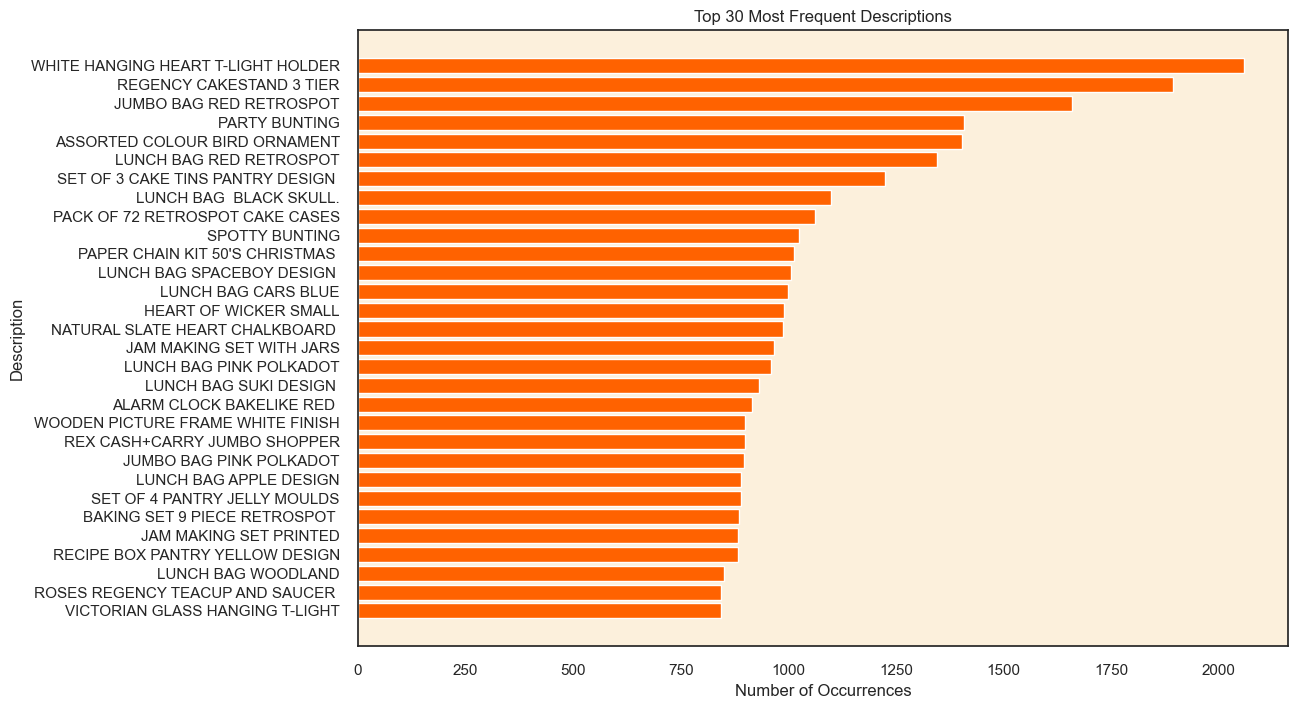

In [26]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

## Nhận xét về Cột Mô tả Sản phẩm (Descriptions)

- Các mô tả xuất hiện nhiều nhất **chủ yếu là đồ gia dụng**, đặc biệt là các sản phẩm liên quan đến:
  - **Dụng cụ nhà bếp**
  - **Túi đựng cơm trưa**
  - **Đồ trang trí**

---

- **Đáng chú ý**, tất cả các mô tả đều được **viết hoa (UPPERCASE)** — điều này có thể là **quy chuẩn định dạng** khi nhập dữ liệu vào cơ sở dữ liệu.

---

- Tuy nhiên, **xét đến những bất thường và thiếu nhất quán đã gặp trong tập dữ liệu**, cần thực hiện kiểm tra kỹ hơn để xác định:
  - Liệu có tồn tại mô tả nào được nhập bằng **chữ thường (lowercase)** hoặc **pha trộn giữa chữ hoa và chữ thường** hay không.
  - Nếu có, cần xử lý đồng nhất để đảm bảo **tính nhất quán dữ liệu** cho phân tích sau này.


In [27]:
# Lấy các mô tả duy nhất trong cột 'Description'
unique_descriptions = df['Description'].dropna().unique()

# Lọc các mô tả chứa ít nhất một ký tự thường (lowercase)
lowercase_descriptions = [desc for desc in unique_descriptions if any(char.islower() for char in desc)]

# In các mô tả bất thường
print("⚠️ Các mô tả chứa ký tự thường (không viết hoa hoàn toàn):")
print("-" * 60)
for desc in lowercase_descriptions:
    print(desc)

# Lọc toàn bộ các dòng trong df có mô tả thuộc danh sách này
rows_with_lowercase = df[df['Description'].isin(lowercase_descriptions)]

# Thống kê
print(f"\n🧾 Tổng số dòng dữ liệu có mô tả viết không hoàn toàn hoa: {rows_with_lowercase.shape[0]}")
print("\n📋 Một số ví dụ:")
print(rows_with_lowercase[['InvoiceNo', 'StockCode', 'Description']].drop_duplicates().head(10))


⚠️ Các mô tả chứa ký tự thường (không viết hoa hoàn toàn):
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image

🧾 Tổng số dòng dữ liệu có mô tả viết không hoàn toàn hoa: 1379

📋 Một số ví dụ:
     InvoiceNo StockCode                         Description
482     536408     21705             BAG 500g SWIRLY MARBLES
918     536500    46000M        POLYESTER FILLER PAD 45x45cm
2038    536557    46000R        POLYESTER FILLER PAD 45x30cm
2039    5365

## Nhận định:

Sau khi xem xét các mô tả sản phẩm có chứa **chữ thường**, có thể thấy rằng **một số mục không phải là mô tả sản phẩm thực tế**, ví dụ như:
- `"Next Day Carriage"`
- `"High Resolution Image"`

Những mục này dường như liên quan đến **dịch vụ** hoặc **thông tin phụ trợ**, **không phải là sản phẩm để bán**.

👉 Do đó, cần lưu ý **lọc bỏ hoặc gắn nhãn riêng** các mô tả này khi thực hiện phân tích sản phẩm và phân cụm khách hàng.


## Chiến lược Xử lý Dữ liệu Cột Mô tả Sản phẩm (Description)

### Bước 1:
- **Loại bỏ** các dòng mà mô tả chứa **thông tin dịch vụ** như:
  - `"Next Day Carriage"`
  - `"High Resolution Image"`
- Lý do: Đây **không phải sản phẩm thực tế** và **không đóng góp giá trị** cho quá trình phân cụm hoặc hệ thống gợi ý mà chúng ta đang xây dựng.

---

### Bước 2:
- Với các mô tả còn lại có **chữ thường** hoặc **kiểu chữ pha trộn**, tiến hành **chuẩn hóa tất cả về dạng chữ in hoa (UPPERCASE)** để:
  - Đảm bảo **sự đồng nhất trong dữ liệu**.
  - **Giảm khả năng trùng lặp mô tả** do khác biệt kiểu chữ.

---

### Lợi ích:
Việc thực hiện chiến lược trên sẽ giúp:
✅ Nâng cao **chất lượng tập dữ liệu**.  
✅ Làm cho dữ liệu **phù hợp hơn** cho giai đoạn phân tích và xây dựng mô hình của dự án.


In [28]:
# Danh sách mô tả không phải sản phẩm (dịch vụ)
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Tính % dòng chứa mô tả dịch vụ
service_related_percentage = (
    df[df['Description'].isin(service_related_descriptions)].shape[0]
    / df.shape[0]
) * 100

# In phần trăm trước khi xử lý
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

The percentage of records with service-related descriptions in the dataset is: 0.02%


Servece-related descriptions chiếm 0.2%. Điều này cho thấy phần lớn mô tả trong dataset là sản phẩm thực tế 
=> loại bỏ 0.2% để đảm bảo dữ liệu sạch, tránh sai lệch khi phân tích

In [29]:
# Xoá các dòng có mô tả dịch vụ
df = df[~df['Description'].isin(service_related_descriptions)]

# Chuẩn hóa mô tả còn lại về viết hoa
df['Description'] = df['Description'].str.upper()


In [30]:
df.shape[0]

399606

# Step 9 | Treating Zero Unit Prices

In [31]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

## Nhận định:

- **Giá trị nhỏ nhất của cột UnitPrice là 0**.  
  Điều này cho thấy có một số giao dịch có **đơn giá bằng 0**, có thể là:
  - **Sản phẩm được tặng miễn phí**.
  - **Lỗi nhập liệu**.

---

### Kế hoạch phân tích tiếp theo:
- Để hiểu rõ hơn về **bản chất của các giao dịch 0 đồng**, cần thực hiện:
  - Phân tích chi tiết **các dòng có UnitPrice bằng 0**.
  - Xem xét **mô tả sản phẩm (Description)** tương ứng để phát hiện xem có tuân theo một **mẫu (pattern) cụ thể** nào không.

---

👉 Việc này sẽ giúp quyết định:
- Liệu có nên loại bỏ các dòng này khỏi phân tích.
- Hay cần xử lý/đánh dấu theo một cách đặc biệt trước khi phân cụm và xây dựng hệ thống gợi ý.


In [32]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [33]:
# Lọc các dòng có UnitPrice = 0 và xem các cột mô tả liên quan
df[df['UnitPrice'] == 0][['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID']]

,InvoiceNo,StockCode,Description,Quantity,CustomerID
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12647.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,16560.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,14911.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,13081.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,13081.0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,15107.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,17560.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,13239.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,13113.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,14410.0


## Nhận định về Cột UnitPrice

- **Số lượng giao dịch có đơn giá bằng 0** là khá ít: chỉ **33 giao dịch**.

- Tuy nhiên, những giao dịch này có **mức độ biến động lớn về số lượng sản phẩm**, cụ thể:
  - Dao động từ **1** đến **12,540** sản phẩm.
  - Độ lệch chuẩn rất cao, cho thấy mức độ phân tán mạnh.

---

### Tác động tiềm ẩn:
- Việc **giữ lại các giao dịch này trong quá trình phân cụm (clustering)** có thể:
  - **Gây nhiễu dữ liệu**.
  - Làm **sai lệch kết quả nhận diện hành vi khách hàng** mà thuật toán phân cụm tạo ra.

---

👉  **loại bỏ** các giao dịch có đơn giá bằng 0 để đảm bảo **chất lượng phân tích và độ chính xác của mô hình**.


## Chiến lược Xử lý Giao dịch Đơn Giá 0

Xét thấy:
- **Số lượng các giao dịch này rất nhỏ** (chỉ 33 giao dịch).
- **Có khả năng gây nhiễu dữ liệu** và ảnh hưởng đến quá trình phân tích.

👉 **Chiến lược hợp lý** là **loại bỏ những giao dịch này khỏi tập dữ liệu**.

---

### Lợi ích:
- Giúp duy trì một **tập dữ liệu sạch và nhất quán hơn**.
- Đảm bảo dữ liệu đầu vào phù hợp cho việc xây dựng:
  - **Mô hình phân cụm khách hàng (Clustering)**.
  - **Hệ thống gợi ý sản phẩm (Recommendation System)**.
- Tăng độ **chính xác** và **đáng tin cậy** của các kết quả phân tích và mô hình.

---

✅ Đây là một bước **tiền xử lý cần thiết** để loại bỏ nhiễu và đảm bảo chất lượng dữ liệu đầu vào cho dự án.


In [34]:
# Xóa các bản ghi có đơn giá bằng 0 để tránh lỗi nhập liệu tiềm ẩn.
df = df[df['UnitPrice'] > 0]

# Step 10 | Outlier Treatment

## Nhận định về Việc Xử Lý Outlier trong Phân Cụm K-means

Trong phân cụm **K-means**, thuật toán rất nhạy cảm với:
- **Quy mô dữ liệu** (scale).
- Sự hiện diện của **giá trị ngoại lai (outliers)**.

Những yếu tố này có thể ảnh hưởng đáng kể đến **vị trí các tâm cụm (centroids)**, từ đó dẫn đến việc **phân cụm sai lệch**.

---

### Tuy nhiên, trong bối cảnh dự án này:
- Mục tiêu cuối cùng là **hiểu hành vi và sở thích của khách hàng** thông qua **K-means**.
- Vì vậy, việc xử lý **outlier** nên được thực hiện **sau giai đoạn xây dựng đặc trưng (feature engineering)**, khi dữ liệu đã được tổng hợp theo **khách hàng**.
- Ở giai đoạn hiện tại, dữ liệu vẫn ở **cấp độ giao dịch**.
- Việc loại bỏ **outlier quá sớm** có thể khiến ta mất đi **những thông tin quan trọng**, vốn có thể đóng vai trò **then chốt trong phân khúc khách hàng** về sau.

---

👉 **Kết luận:**
- **Hoãn xử lý outlier** ở giai đoạn này.
- Tiếp tục chuyển sang bước tiếp theo trong quá trình xử lý dữ liệu.

---

🎯 Khi hoàn tất **feature engineering** và có dataset **theo khách hàng**, chúng ta sẽ quay lại xử lý outlier để đảm bảo **tính chính xác của phân cụm**.


In [35]:
# Đặt lại chỉ số dòng cho tập dữ liệu đã làm sạch
df.reset_index(drop=True, inplace=True)
# Lấy số lượng dòng trong DataFrame
df.shape[0]

399573

# Step 11 | Feature Engineering

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

## Step 11.1 | RFM Features

## Giới thiệu về RFM

**RFM** là một phương pháp được sử dụng để **phân tích giá trị khách hàng** và **phân khúc tập khách hàng**.  
Tên gọi **"RFM"** là viết tắt của ba yếu tố chính:

---

### 🔹 Recency (R) – Gần đây nhất:
- Chỉ ra **khách hàng đã mua hàng gần đây đến mức nào**.
- **Giá trị R càng thấp** → khách hàng mua hàng càng gần đây → thể hiện **mức độ tương tác cao** với thương hiệu.

---

### 🔹 Frequency (F) – Tần suất mua hàng:
- Cho biết **khách hàng mua hàng bao nhiêu lần** trong một khoảng thời gian nhất định.
- **Tần suất càng cao** → khách hàng càng thường xuyên quay lại → thể hiện **sự trung thành hoặc mức độ hài lòng cao**.

---

### 🔹 Monetary (M) – Giá trị tiền chi tiêu:
- Là **tổng số tiền khách hàng đã chi tiêu** trong một khoảng thời gian.
- **Giá trị M càng cao** → khách hàng đóng góp doanh thu lớn hơn → tiềm năng trở thành **khách hàng có giá trị cao** trong dài hạn.

---

### ✅ Ý nghĩa:
Khi **kết hợp ba chỉ số này**, bạn có thể:
- Hiểu rõ **hành vi và giá trị của khách hàng**.
- Cá nhân hóa **chiến lược marketing**.
- Xây dựng **hệ thống gợi ý sản phẩm** phù hợp và hiệu quả hơn.


### Step 11.1.1 | Recency (R)

## Phân tích Mức Độ Gần Đây trong Hành Vi Mua Hàng

Trong bước này, chúng ta sẽ tập trung vào việc **hiểu mức độ gần đây** mà khách hàng đã thực hiện giao dịch mua hàng.  
Đây là một yếu tố quan trọng trong việc **phân khúc khách hàng**, vì nó giúp xác định **mức độ tương tác của khách hàng với doanh nghiệp**.

---

### 🏷 Days Since Last Purchase (Số ngày kể từ lần mua hàng gần nhất):
- Thể hiện **số ngày đã trôi qua** kể từ **lần mua hàng cuối cùng** của khách hàng.
- **Giá trị thấp** → khách hàng vừa mua hàng gần đây → phản ánh **mức độ tương tác cao**.
- **Giá trị cao** → dấu hiệu của **sự ngừng tương tác** hoặc **mức độ quan tâm giảm sút**.

---

### ✅ Ý nghĩa:
Hiểu rõ tính **"gần đây"** trong hành vi mua hàng giúp doanh nghiệp:
- **Tùy chỉnh chiến lược marketing**, đặc biệt là:
  - **Tái tương tác với các khách hàng đã lâu không mua hàng**.
- **Tăng tỷ lệ giữ chân khách hàng**.
- **Xây dựng lòng trung thành** bền vững hơn.

In [36]:
# Chuyển cột InvoiceDate sang kiểu dữ liệu datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Trích xuất phần ngày (bỏ giờ) từ InvoiceDate và lưu vào cột mới InvoiceDay
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Tìm ngày mua hàng gần nhất của mỗi khách hàng
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Tìm ngày giao dịch gần nhất trong toàn bộ tập dữ liệu
most_recent_date = df['InvoiceDay'].max()

# Chuyển cột InvoiceDay về kiểu datetime trước khi thực hiện phép trừ
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Tính số ngày kể từ lần mua hàng gần nhất của mỗi khách hàng
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Xoá cột InvoiceDay vì đã tính xong Recency
customer_data.drop(columns=['InvoiceDay'], inplace=True)


In [37]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Tôi đã đặt tên cho dataframe tập trung vào khách hàng là **`customer_data`**, mà cuối cùng sẽ chứa tất cả các **đặc điểm dựa trên khách hàng** mà chúng tôi dự định tạo ra.


### Step 11.1.2 | Frequency (F)

## Tạo Đặc Trưng Định Lượng Mức Độ Tương Tác Khách Hàng

Trong bước này, tôi sẽ tạo ra **hai đặc trưng** nhằm **định lượng mức độ tương tác của khách hàng** với nhà bán lẻ:

---

### 🔹 Tổng số giao dịch (Total Transactions):
- Thể hiện **tổng số lần giao dịch** mà một khách hàng đã thực hiện.
- Giúp đánh giá **mức độ tương tác** của khách hàng với doanh nghiệp.

---

### 🔹 Tổng số sản phẩm đã mua (Total Products Purchased):
- Cho biết **tổng số lượng sản phẩm** (tổng **Quantity**) mà khách hàng đã mua qua **tất cả các giao dịch**.
- Phản ánh **hành vi mua sắm** của khách hàng về mặt **khối lượng sản phẩm**.

---

### ✅ Ý nghĩa:
Hai đặc trưng này sẽ đóng vai trò **quan trọng** trong việc:
- **Phân khúc khách hàng** dựa trên **tần suất mua hàng**.
- Là **yếu tố then chốt** để xây dựng:
  - **Chiến dịch marketing nhắm mục tiêu**.
  - **Hệ thống gợi ý sản phẩm cá nhân hóa**.


In [38]:
# Tính tổng số giao dịch mà mỗi khách hàng đã thực hiện
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Tính tổng số lượng sản phẩm mà mỗi khách hàng đã mua
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Gộp (merge) các đặc trưng mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


### Step 11.1.3 | Monetary (M)  

## Tạo Đặc Trưng Phản Ánh Khía Cạnh Chi Tiêu (Monetary)

Trong bước này, tôi sẽ tạo ra **hai đặc trưng** phản ánh **khía cạnh chi tiêu** của các giao dịch của khách hàng:

---

### 🔹 Tổng chi tiêu (Total Spend):
- Biểu thị **tổng số tiền mà mỗi khách hàng đã chi tiêu**.
- Được tính bằng **tổng của (UnitPrice × Quantity)** trên **tất cả các giao dịch** của khách hàng.
- Đây là một đặc trưng **quan trọng**, vì nó giúp:
  - Xác định **tổng doanh thu** mà khách hàng mang lại.
  - Là **chỉ báo trực tiếp** về **giá trị của khách hàng** đối với doanh nghiệp.

---

### 🔹 Giá trị giao dịch trung bình (Average Transaction Value):
- Được tính bằng **Tổng chi tiêu** chia cho **Tổng số giao dịch** của mỗi khách hàng.
- Cho biết **giá trị trung bình của mỗi giao dịch** mà khách hàng thực hiện.
- Chỉ số này rất hữu ích để:
  - Hiểu **hành vi chi tiêu theo từng lần mua**.
  - Hỗ trợ xây dựng các **chiến lược marketing** và **ưu đãi phù hợp** cho từng nhóm khách hàng, dựa trên **mô hình chi tiêu trung bình** của họ.

---

✅ Hai đặc trưng này sẽ giúp **phân loại khách hàng** dựa trên **giá trị tài chính**, từ đó xây dựng **chiến lược kinh doanh** và **hệ thống gợi ý sản phẩm** chính xác hơn.

In [39]:
# Tính tổng chi tiêu của mỗi khách hàng
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Tính giá trị giao dịch trung bình của mỗi khách hàng
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Gộp các đặc trưng mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


In [40]:
#Giải thích lý do tại sao customerID 12346 có 2 transaction
df[df['CustomerID'] == 12346.0][['InvoiceNo', 'UnitPrice', 'Quantity', 'Total_Spend']]

,InvoiceNo,UnitPrice,Quantity,Total_Spend
37334,541431,1.04,74215,77183.6
37339,C541433,1.04,-74215,-77183.6


In [41]:
customer_data= customer_data[customer_data['Average_Transaction_Value']>=0]

## Phân tích Sự Đa Dạng trong Hành Vi Mua Sản Phẩm

Trong bước này, chúng ta sẽ **tìm hiểu sự đa dạng** trong hành vi mua sản phẩm của khách hàng.  
Việc hiểu được mức độ **đa dạng sản phẩm mà khách hàng mua** có thể giúp doanh nghiệp:
- Thiết kế các **chiến lược marketing cá nhân hóa**.
- Đề xuất sản phẩm **phù hợp hơn** với từng nhóm khách hàng.

---

### 🔹 Số lượng sản phẩm khác nhau đã mua (Unique Products Purchased):
- Biểu thị **số lượng sản phẩm khác nhau** mà một khách hàng đã mua.
- **Giá trị cao** → khách hàng có **thị hiếu đa dạng**, mua nhiều loại sản phẩm khác nhau.
- **Giá trị thấp** → khách hàng có **sở thích cụ thể**, thường mua tập trung vào một vài mặt hàng nhất định.

---

### ✅ Ý nghĩa:
Việc phân tích mức độ **đa dạng trong hành vi mua hàng** sẽ giúp:
- Phân nhóm khách hàng dựa trên **độ phong phú trong lựa chọn sản phẩm**.
- Là **yếu tố quan trọng** trong việc xây dựng **gợi ý sản phẩm cá nhân hóa** và chiến lược chăm sóc khách hàng phù hợp.

---



In [42]:
# Tính số lượng sản phẩm khác nhau mà mỗi khách hàng đã mua
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Gộp đặc trưng mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


## Step 11.2 | Behavioral Features

## Phân tích Mô hình Mua Sắm và Hành Vi Khách Hàng

🎯 Trong bước này, chúng ta sẽ **tìm hiểu và ghi nhận các mô hình mua sắm (shopping patterns)** cũng như **hành vi của khách hàng**.

Những đặc trưng này sẽ cung cấp **cái nhìn sâu hơn về thói quen và sở thích mua sắm**, từ đó giúp **cá nhân hóa trải nghiệm mua sắm** một cách hiệu quả hơn.

---

### 🔹 Số ngày trung bình giữa các lần mua (Average Days Between Purchases):
- Phản ánh **số ngày trung bình mà khách hàng chờ giữa các lần mua hàng**.
- Hiểu được khoảng cách giữa các giao dịch giúp:
  - **Dự đoán thời điểm mua tiếp theo**.
  - Hỗ trợ hiệu quả cho **các chiến dịch marketing nhắm mục tiêu** và **khuyến mãi cá nhân hóa**.

---

### 🔹 Ngày mua sắm ưa thích (Favorite Shopping Day):
- Là **ngày trong tuần** mà khách hàng **mua hàng nhiều nhất**.
- Thông tin này giúp:
  - Xác định ngày khách hàng thường mua sắm.
  - **Tối ưu hóa các chiến dịch marketing** và chương trình khuyến mãi theo **từng ngày trong tuần**.

---

### 🔹 Giờ mua sắm ưa thích (Favorite Shopping Hour):
- Là **giờ trong ngày** mà khách hàng **mua hàng nhiều nhất**.
- Việc xác định khung giờ mua sắm ưa thích giúp doanh nghiệp:
  - Điều chỉnh thời điểm chạy **quảng cáo**, **email marketing**, **ưu đãi**...
  - Nhắm trúng **thời điểm khách hàng có khả năng tương tác cao nhất**.

---

### ✅ Ý nghĩa:
Việc bổ sung các **đặc trưng hành vi** này vào tập dữ liệu sẽ giúp:
- Hiểu khách hàng **toàn diện hơn**.
- Nâng cao hiệu quả của thuật toán **phân cụm khách hàng (clustering)**.
- Tạo ra những **nhóm khách hàng có ý nghĩa và hành động rõ ràng hơn** để phục vụ mục tiêu **marketing và gợi ý sản phẩm**.

---


In [43]:
# Trích xuất ngày trong tuần và giờ trong ngày từ cột InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Tính số ngày trung bình giữa các lần mua hàng liên tiếp của mỗi khách hàng
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Tìm ngày trong tuần mà mỗi khách hàng mua hàng nhiều nhất (ngày mua sắm ưa thích)
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Tìm giờ trong ngày mà mỗi khách hàng mua hàng nhiều nhất (giờ mua sắm ưa thích)
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Gộp các đặc trưng hành vi mới vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


## Step 11.3 | Geographic Features

## Thêm Đặc Trưng Vị Trí Địa Lý Khách Hàng

Trong bước này, chúng ta sẽ thêm một **đặc trưng về vị trí địa lý** phản ánh **khu vực sinh sống của khách hàng**.

Việc hiểu rõ **phân bố địa lý của khách hàng** là rất quan trọng vì nhiều lý do sau:

---

### 🔹 Quốc gia (Country):
- Đặc trưng này cho biết **khách hàng đến từ quốc gia nào**.
- Việc đưa dữ liệu quốc gia vào sẽ giúp:
  - Hiểu được **các xu hướng mua sắm và sở thích theo khu vực**.
  - Phát hiện rằng **mỗi khu vực có thể có sở thích, hành vi mua hàng khác nhau** → ảnh hưởng đến **chiến lược marketing cá nhân hóa**.

---

### ✅ Lợi ích:
- **Hỗ trợ lập kế hoạch tồn kho** chính xác hơn, phù hợp với nhu cầu tại từng vùng.
- Đóng vai trò quan trọng trong **tối ưu hóa logistics và chuỗi cung ứng**, đặc biệt với các nhà bán lẻ trực tuyến, nơi **vận chuyển và giao hàng** là yếu tố then chốt.

---


In [44]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

## Nhận định:

- **Vì một tỷ lệ lớn (89%) các giao dịch đến từ Vương quốc Anh (United Kingdom)**, nên chúng ta có thể cân nhắc **tạo một biến nhị phân** để biểu thị liệu **một giao dịch có đến từ UK hay không**.

---

### Lợi ích của cách tiếp cận này:
- Giúp **đơn giản hóa quá trình phân cụm** (clustering).
- Vẫn **giữ lại thông tin địa lý quan trọng**.
- Đặc biệt hữu ích khi áp dụng các thuật toán như **K-means**, vốn **nhạy cảm với số chiều (dimensionality)** của không gian đặc trưng.

---

✅ Biến nhị phân `Is_UK_Customer` có thể được tạo, với giá trị:
- **1** nếu khách hàng đến từ UK.
- **0** nếu khách hàng đến từ quốc gia khác.

---


## Phương pháp thực hiện:

- **Đầu tiên**, tôi sẽ **group dữ liệu theo CustomerID và Country**, sau đó **tính số lượng giao dịch** tại mỗi quốc gia đối với từng khách hàng.

- **Tiếp theo**, tôi sẽ **xác định quốc gia chính của mỗi khách hàng** — tức là **quốc gia mà họ thực hiện nhiều giao dịch nhất**.

- Sau đó, tôi sẽ **tạo một cột nhị phân (binary column)** để xác định khách hàng có đến từ **Vương quốc Anh (UK)** hay không.

- **Cuối cùng**, tôi sẽ **gộp (merge)** thông tin này vào bảng **customer_data** để **bổ sung đặc trưng địa lý mới** cho quá trình phân tích.

In [45]:
# Nhóm dữ liệu theo CustomerID và Country để tính số giao dịch tại mỗi quốc gia cho từng khách hàng
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Lấy quốc gia có số lượng giao dịch nhiều nhất cho mỗi khách hàng (trường hợp khách hàng có nhiều quốc gia khác nhau)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Tạo cột nhị phân để xác định khách hàng có đến từ UK hay không (1 nếu là UK, ngược lại là 0)
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Gộp thông tin quốc gia chính của khách hàng vào bảng customer_data
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [46]:
customer_data['Is_UK'].value_counts()


Is_UK
1    3849
0     414
Name: count, dtype: int64

## Step 11.4 | Cancellation Insights

## Phân tích Mẫu Hành Vi Hủy Đơn Hàng của Khách Hàng

Trong bước này, tôi sẽ **đi sâu vào phân tích các mẫu hành vi hủy đơn hàng của khách hàng** nhằm thu thập những thông tin có thể nâng cao hiệu quả mô hình phân khúc khách hàng.

---

### 🔹 Tần suất hủy đơn (Cancellation Frequency):
- Chỉ số này thể hiện **tổng số giao dịch mà khách hàng đã hủy**.
- Việc hiểu rõ tần suất hủy đơn giúp:
  - Xác định những khách hàng **có xu hướng hay hủy đơn**.
  - Phát hiện các **vấn đề tiềm ẩn** hoặc dấu hiệu của **sự không hài lòng**.
- Việc phát hiện sớm hành vi này giúp doanh nghiệp:
  - Điều chỉnh chiến lược để **giảm thiểu tỷ lệ hủy đơn**.
  - **Tăng sự hài lòng của khách hàng**.

---

### 🔹 Tỷ lệ hủy đơn (Cancellation Rate):
- Là **tỷ lệ giữa số lượng đơn bị hủy và tổng số giao dịch của khách hàng**.
- Chỉ số này cung cấp một cái nhìn **chuẩn hóa về hành vi hủy đơn**.
- **Tỷ lệ hủy cao** có thể là dấu hiệu của:
  - Một phân khúc khách hàng **không hài lòng**.
  - Doanh nghiệp cần xây dựng **chiến lược nhắm mục tiêu cụ thể** để:
    - Cải thiện trải nghiệm mua sắm.
    - Giảm tỷ lệ hủy.

---

### ✅ Ý nghĩa:
Việc tích hợp các thông tin về **hành vi hủy đơn** vào tập dữ liệu sẽ giúp:
- Xây dựng một **bức tranh toàn diện hơn về hành vi khách hàng**.
- Hỗ trợ **phân khúc khách hàng chính xác và hiệu quả hơn**.

In [47]:
# Tính tổng số giao dịch của mỗi khách hàng
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Lọc các giao dịch bị hủy (Transaction_Status = 'Cancelled') và tính số lượng giao dịch bị hủy của mỗi khách hàng
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Ép kiểu CustomerID về string ở tất cả các DataFrame liên quan trước khi merge
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)
total_transactions['CustomerID'] = total_transactions['CustomerID'].astype(str)
cancellation_frequency['CustomerID'] = cancellation_frequency['CustomerID'].astype(str)

# Gộp số lượng hủy đơn vào bảng customer_data theo CustomerID
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Thay thế giá trị NaN bằng 0 (với những khách hàng không hủy đơn nào)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Tính tỷ lệ hủy đơn = số đơn bị hủy / tổng số giao dịch
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / customer_data['Total_Transactions']

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


## Step 11.5 | Seasonality & Trends

## Phân tích Yếu Tố Mùa Vụ và Xu Hướng Chi Tiêu Của Khách Hàng

Trong bước này, tôi sẽ phân tích sâu hơn về yếu tố **mùa vụ (seasonality)** và **xu hướng (trend)** trong hành vi chi tiêu của khách hàng.  
Điều này cung cấp những **hiểu biết vô cùng giá trị** để tùy chỉnh **chiến lược marketing** và nâng cao **sự hài lòng của khách hàng**.

---

### Các đặc trưng dự kiến sẽ thêm vào:

---

### 🔹 Monthly_Spending_Mean (Chi tiêu trung bình theo tháng):
- Là **giá trị chi tiêu trung bình hàng tháng** của mỗi khách hàng.
- Giúp đánh giá **thói quen chi tiêu tổng thể** của khách.
- Ý nghĩa:
  - **Giá trị trung bình cao** → khách hàng chi tiêu nhiều, có thể quan tâm đến **sản phẩm cao cấp**.
  - **Giá trị trung bình thấp** → khách hàng có xu hướng **chi tiêu tiết kiệm** hơn.

---

### 🔹 Monthly_Spending_Std (Độ lệch chuẩn chi tiêu hàng tháng):
- Phản ánh **mức độ dao động trong chi tiêu hàng tháng** của khách hàng.
- Ý nghĩa:
  - **Độ lệch chuẩn cao** → chi tiêu **không ổn định**, có thể có các **giao dịch lớn bất thường**.
  - **Độ lệch chuẩn thấp** → khách hàng có **thói quen chi tiêu đều đặn, ổn định**.
- Hiểu được độ biến động này giúp:
  - **Thiết kế khuyến mãi cá nhân hóa**, đặc biệt vào các thời điểm khách có xu hướng chi tiêu cao hơn.

---

### 🔹 Spending_Trend (Xu hướng chi tiêu):
- Phản ánh **xu hướng thay đổi chi tiêu theo thời gian** của mỗi khách hàng.
- Được tính bằng **độ dốc của đường hồi quy tuyến tính** dựa trên dữ liệu chi tiêu theo thời gian.
- Ý nghĩa:
  - **Giá trị dương** → xu hướng **chi tiêu tăng dần**, có thể là dấu hiệu của **sự trung thành** hoặc **mức độ hài lòng tăng**.
  - **Giá trị âm** → xu hướng **giảm chi tiêu**, có thể báo hiệu **sự giảm quan tâm** hoặc **không hài lòng**.
  - **Gần bằng 0** → **thói quen chi tiêu ổn định**.
- Nhận diện xu hướng này giúp doanh nghiệp:
  - **Duy trì** hoặc **điều chỉnh** hành vi chi tiêu.
  - **Tăng hiệu quả các chiến dịch marketing**.

---

### ✅ Ý nghĩa tổng quan:
Việc tích hợp các đặc trưng chi tiết này vào **mô hình phân khúc khách hàng** giúp:
- Xây dựng **nhóm khách hàng chính xác và hành động được hơn**.
- Thiết kế các **chiến lược marketing** và **khuyến mãi** được **cá nhân hóa tối đa**.


In [48]:
# Trích xuất năm và tháng từ cột InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Tính tổng chi tiêu hàng tháng của mỗi khách hàng
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Tính đặc trưng mua sắm theo mùa: sử dụng chi tiêu hàng tháng để biểu diễn hành vi mùa vụ
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Thay giá trị NaN trong Monthly_Spending_Std bằng 0 (áp dụng cho khách chỉ mua trong 1 tháng)
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Tính xu hướng chi tiêu theo thời gian
# Sử dụng độ dốc (slope) của đường hồi quy tuyến tính để biểu diễn xu hướng chi tiêu của khách

def calculate_trend(spend_data):
    # Nếu có nhiều hơn 1 điểm dữ liệu, tính độ dốc của đường hồi quy tuyến tính
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # Nếu chỉ có 1 điểm dữ liệu thì không thể tính được xu hướng, trả về 0
    else:
        return 0

# Áp dụng hàm calculate_trend để tính xu hướng chi tiêu cho từng khách hàng
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)
seasonal_buying_patterns['CustomerID'] = seasonal_buying_patterns['CustomerID'].astype(str)
spending_trends['CustomerID'] = spending_trends['CustomerID'].astype(str)

# Gộp các đặc trưng mới vào bảng customer_data
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Hiển thị vài dòng đầu tiên của bảng customer_data sau khi cập nhật
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [49]:
customer_data= customer_data[customer_data['Monthly_Spending_Mean']>=0]

We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.
*** Tiếng Việt ***
Chúng ta đã hoàn thành một công việc tuyệt vời cho đến thời điểm này!
Chúng ta đã tạo ra một tập dữ liệu tập trung vào khách hàng, sử dụng nhiều đặc trưng mới giúp hiểu sâu hơn về hành vi mua sắm và sở thích của họ.

In [50]:
# Chuyển kiểu dữ liệu của 'CustomerID' thành chuỗi (string) vì đây là mã định danh, không dùng để tính toán
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Tự động chuyển đổi kiểu dữ liệu các cột sang kiểu tối ưu nhất (ví dụ: int -> Int64, float -> Float64, object -> string,...)
customer_data = customer_data.convert_dtypes()


In [51]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
5,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629,9.351
6,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0,0.0
7,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0,0.0
8,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635


In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4263 non-null   string 
 1   Days_Since_Last_Purchase        4263 non-null   Int64  
 2   Total_Transactions              4263 non-null   Int64  
 3   Total_Products_Purchased        4263 non-null   Int64  
 4   Total_Spend                     4263 non-null   Float64
 5   Average_Transaction_Value       4263 non-null   Float64
 6   Unique_Products_Purchased       4263 non-null   Int64  
 7   Average_Days_Between_Purchases  4263 non-null   Float64
 8   Day_Of_Week                     4263 non-null   Int32  
 9   Hour                            4263 non-null   Int32  
 10  Is_UK                           4263 non-null   Int64  
 11  Cancellation_Frequency          4263 non-null   Int64  
 12  Cancellation_Rate               42

## Mô Tả Dataset Khách Hàng (Customer Dataset Description)

| Biến                        | Mô Tả                                                                                                                                                                |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CustomerID                 | Mã định danh duy nhất được gán cho từng khách hàng, dùng để phân biệt các khách hàng.                                                                              |
| Days_Since_Last_Purchase   | Số ngày đã trôi qua kể từ lần mua hàng gần nhất của khách hàng.                                                                                                    |
| Total_Transactions         | Tổng số giao dịch mà khách hàng đã thực hiện.                                                                                                                       |
| Total_Products_Purchased   | Tổng số lượng sản phẩm mà khách hàng đã mua qua tất cả các giao dịch.                                                                                                |
| Total_Spend                | Tổng số tiền mà khách hàng đã chi tiêu qua tất cả các giao dịch.                                                                                                     |
| Average_Transaction_Value  | Giá trị trung bình của các giao dịch, được tính bằng tổng chi tiêu chia cho số lượng giao dịch.                                                                      |
| Unique_Products_Purchased  | Số lượng sản phẩm khác nhau mà khách hàng đã mua.                                                                                                                    |
| Average_Days_Between_Purchases | Số ngày trung bình giữa các lần mua hàng liên tiếp của khách hàng.                                                                                                  |
| Day_Of_Week                | Ngày trong tuần mà khách hàng thích mua hàng nhất (biểu diễn bằng số, 0 là Thứ Hai, 6 là Chủ Nhật).                                                                  |
| Hour                       | Giờ trong ngày mà khách hàng thích mua hàng nhất (định dạng 24 giờ).                                                                                                  |
| Is_UK                      | Biến nhị phân xác định khách hàng có đến từ Vương quốc Anh hay không (1 nếu có, 0 nếu không).                                                                         |
| Cancellation_Frequency     | Tổng số giao dịch mà khách hàng đã hủy.                                                                                                                              |
| Cancellation_Rate          | Tỷ lệ hủy đơn, được tính bằng số giao dịch hủy chia cho tổng số giao dịch.                                                                                           |
| Monthly_Spending_Mean      | Chi tiêu trung bình hàng tháng của khách hàng.                                                                                                                       |
| Monthly_Spending_Std       | Độ lệch chuẩn của chi tiêu hàng tháng của khách hàng, phản ánh mức độ biến động trong hành vi chi tiêu.                                                               |
| Spending_Trend             | Giá trị số phản ánh xu hướng chi tiêu của khách hàng theo thời gian: giá trị dương là tăng, giá trị âm là giảm, gần 0 là ổn định.                                     |


Chúng ta đã tạo ra một **tập dữ liệu tập trung vào khách hàng**, với **nhiều đặc trưng mới** giúp chúng ta **hiểu sâu hơn về hành vi mua sắm và sở thích của họ**.

---

## Bước tiếp theo của dự án:

Giờ đây khi tập dữ liệu đã **sẵn sàng**, chúng ta có thể chuyển sang các bước tiếp theo của dự án, bao gồm:

- **Xem xét dữ liệu kỹ hơn** để tìm ra các **mẫu (patterns)** hoặc **xu hướng (trends)**.
- **Đảm bảo chất lượng dữ liệu** bằng cách kiểm tra và xử lý các **giá trị ngoại lai (outliers)**.
- **Chuẩn bị dữ liệu** cho quá trình **phân cụm (clustering)**.

---

## Ý nghĩa:

Tất cả các bước này sẽ giúp chúng ta:
✅ Xây dựng một **nền tảng vững chắc** để tạo ra các **phân khúc khách hàng có ý nghĩa**.  
✅ Và cuối cùng là **phát triển một hệ thống gợi ý cá nhân hóa hiệu quả**, phù hợp với nhu cầu và hành vi của từng nhóm khách hàng.


# Step 12 | Outlier Detection and Treatment

## Nhận Diện và Xử Lý Outliers

Trong phần này, tôi sẽ **nhận diện và xử lý các giá trị ngoại lai (outliers)** trong tập dữ liệu.

---

### Outliers là gì?
- Outlier là những **điểm dữ liệu khác biệt đáng kể** so với phần lớn các điểm còn lại trong tập dữ liệu.
- Những điểm này có thể **làm sai lệch kết quả phân tích**, đặc biệt là trong **phân cụm K-means**, nơi mà outliers có thể **ảnh hưởng mạnh đến vị trí của các tâm cụm (centroids)**.

---

### Tại sao cần xử lý outliers?
✅ Giúp thu được kết quả **phân cụm chính xác và có ý nghĩa hơn**.  
✅ Tránh **sai lệch** do các giá trị bất thường gây ra.

---

### Phương pháp phát hiện outliers:
🔍 Vì dữ liệu của chúng ta có **nhiều chiều (multi-dimensional)**, nên sẽ hợp lý hơn nếu sử dụng các thuật toán có khả năng phát hiện outliers trong không gian nhiều chiều.

---

### Tôi sẽ sử dụng **Isolation Forest**:
- Thuật toán này hoạt động tốt với **dữ liệu nhiều chiều**.
- Có **hiệu suất tính toán cao**.
- **Cơ chế hoạt động**:
  - **Cô lập điểm dữ liệu** bằng cách chọn ngẫu nhiên một đặc trưng.
  - Chọn **giá trị phân tách ngẫu nhiên** giữa giá trị lớn nhất và nhỏ nhất của đặc trưng đó.

---

➡ **Hãy cùng triển khai phương pháp này nhé!**


In [53]:
#kiểm tra có bao nhiêu cột
df.shape[1]


15

In [54]:
#kiểm tra customer_data có bao nhiêu cột có kiểu dữ liệu số
print("Tổng số chiều số:", customer_data.select_dtypes(include='number').shape[1])

Tổng số chiều số: 15


In [55]:
# Khởi tạo mô hình IsolationForest với tham số contamination = 0.05 (tức là giả định 5% dữ liệu là outlier)
model = IsolationForest(contamination=0.05, random_state=0)

# Huấn luyện mô hình trên dữ liệu (chuyển DataFrame thành NumPy để tránh cảnh báo)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())


In [56]:
# Tạo cột mới 'Is_Outlier' để dễ hiểu hơn: 1 nếu là outlier, 0 nếu không phải
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]
# Hiển thị vài dòng đầu tiên sau khi thêm thông tin outlier
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


## Trực Quan Hóa Kết Quả Phát Hiện Outliers

Sau khi áp dụng thuật toán **Isolation Forest**, chúng ta đã:

✅ **Xác định được các giá trị ngoại lai (outliers)** và đánh dấu chúng trong một cột mới có tên là **Is_Outlier**.

✅ Tính toán được **điểm bất thường (outlier scores)**, phản ánh **mức độ bất thường** của từng bản ghi trong tập dữ liệu.

---

### 📊 Tiếp theo:
- Trực quan hóa **phân bố của các điểm số bất thường** (outlier scores).
- Trực quan hóa **số lượng điểm bình thường (inliers)** và **điểm ngoại lai (outliers)** mà mô hình đã phát hiện.

---

🎯 Việc trực quan hóa này giúp:
- Hiểu rõ **đặc điểm phân bố outliers**.
- Xác định xem outliers xuất hiện ở mức độ nào so với phần còn lại của dữ liệu.


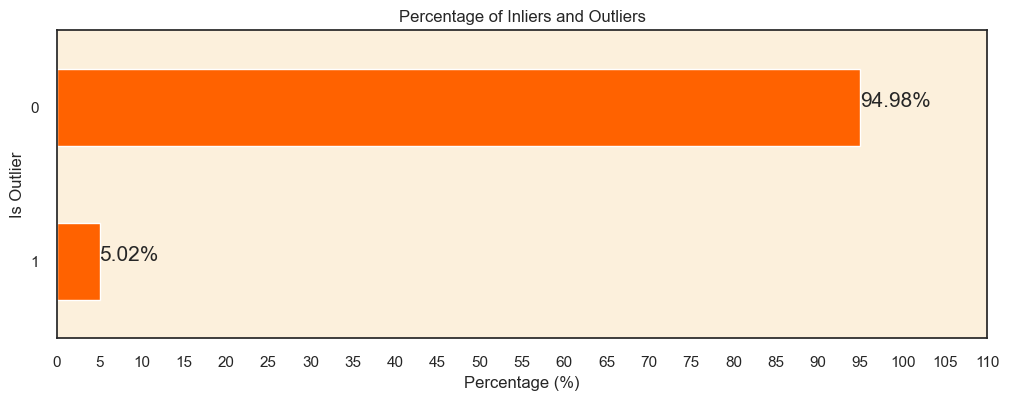

In [57]:
# Tính % của inliers và outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')


for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

## Nhận định:

Từ biểu đồ ở trên, chúng ta có thể thấy rằng **khoảng 5% khách hàng** đã được xác định là **outliers** trong tập dữ liệu.

---

### Tỷ lệ này có vẻ hợp lý:
- **Không quá cao** đến mức loại bỏ nhiều dữ liệu quan trọng.
- **Cũng không quá thấp** đến mức giữ lại nhiều điểm nhiễu.

---

### Kết luận:
✅ Điều này cho thấy **thuật toán Isolation Forest** đã hoạt động hiệu quả, xác định được **một tỷ lệ vừa phải** các ngoại lệ.  
✅ Việc này **rất quan trọng** để nâng cao **độ chính xác của mô hình phân cụm khách hàng** sau này.

## Chiến lược:

Xét trong bối cảnh của dự án (**phân cụm khách hàng bằng clustering**), việc **xử lý outliers** là **rất quan trọng** để:

- Ngăn **outliers làm sai lệch các cụm phân nhóm**.
- Tăng **chất lượng** và **độ chính xác** của kết quả phân cụm.

---

### Các bước thực hiện:

1️⃣ **Tách riêng các outliers** để phục vụ cho **phân tích chuyên sâu sau này** (có thể **lưu ra file riêng** – tùy chọn).

2️⃣ **Loại bỏ các outliers** khỏi tập dữ liệu chính để chuẩn bị cho quá trình phân cụm.

3️⃣ **Xóa các cột phụ trợ** (`Outlier_Scores` và `Is_Outlier`) vì chúng chỉ được dùng cho bước phát hiện outlier.

---

🎯 **Hãy cùng thực hiện các bước này nhé!**


In [58]:
# Tách các dòng được đánh dấu là outlier ra để phân tích riêng
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]
# Loại bỏ các outliers khỏi tập dữ liệu chính để chuẩn bị cho bước phân cụm
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]
# Xóa các cột phụ trợ dùng để xác định outliers vì không còn cần thiết nữa
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])
# Đặt lại chỉ số dòng cho bảng dữ liệu đã được làm sạch
customer_data_cleaned.reset_index(drop=True, inplace=True)

## Kết quả xử lý Outliers

Chúng ta đã **tách thành công các giá trị ngoại lai (outliers)** để **phân tích riêng**, đồng thời **làm sạch tập dữ liệu chính** bằng cách loại bỏ những outliers này.

---

### Tập dữ liệu sau khi làm sạch hiện đã sẵn sàng cho các bước tiếp theo trong dự án phân khúc khách hàng, bao gồm:

✅ **Chuẩn hóa các đặc trưng (scaling features)**.

✅ **Áp dụng thuật toán phân cụm (clustering)** để xác định các **nhóm khách hàng khác biệt**.


In [59]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4049

# Step 13 | Feature Scaling

## Tại sao cần chuẩn hóa (Scaling) dữ liệu trước khi phân cụm và giảm chiều?

Trước khi tiến hành các bước **phân cụm (clustering)** , việc **chuẩn hóa (scale)** các đặc trưng là điều **bắt buộc**.

Bước này **đặc biệt quan trọng** khi làm việc với các thuật toán **dựa trên khoảng cách** như **K-means**

---

### Lý do:

---

### 🔹 Đối với phân cụm K-means:
- **K-means dựa rất nhiều vào khái niệm "khoảng cách"** giữa các điểm dữ liệu để hình thành các cụm.
- Nếu các đặc trưng không được đưa về cùng **thang đo**, những đặc trưng có **giá trị lớn hơn** sẽ chi phối kết quả phân cụm.
- Điều này dẫn đến **kết quả phân nhóm không chính xác**.

---

✅ Vì vậy, việc **chuẩn hóa dữ liệu** trước khi thực hiện K-means là **rất quan trọng** để đảm bảo tính **công bằng** giữa các đặc trưng và **độ chính xác** của kết quả phân tích.


## Phương pháp chuẩn hóa dữ liệu (Methodology)

Để đảm bảo các đặc trưng có **ảnh hưởng cân bằng** lên mô hình và khám phá được **các mẫu tiềm ẩn thực sự** trong dữ liệu, tôi sẽ tiến hành **chuẩn hóa (standardize)** dữ liệu, nghĩa là:

- Chuyển đổi các đặc trưng sao cho có:
  - Trung bình = 0
  - Độ lệch chuẩn = 1

---

### Tuy nhiên, không phải tất cả các đặc trưng đều cần được chuẩn hóa. Dưới đây là các ngoại lệ và lý do loại trừ:

---

### ❌ Không chuẩn hóa:

- **CustomerID**:  
  - Đây chỉ là mã định danh khách hàng, không mang ý nghĩa phân tích cho bài toán clustering.

- **Is_UK**:  
  - Là một biến nhị phân (0 hoặc 1) biểu thị khách hàng có đến từ UK hay không.
  - Do đã ở dạng nhị phân, việc chuẩn hóa sẽ **không mang lại ý nghĩa** đáng kể.

- **Day_Of_Week**:  
  - Đại diện cho **ngày trong tuần** mà khách hàng thường mua hàng nhất (1–7).
  - Đây là một đặc trưng dạng **categorical dạng số**, không cần chuẩn hóa.

---

✅ Tôi sẽ chuẩn hóa **các đặc trưng còn lại** trong dataset để chuẩn bị cho bước tiếp theo:**K-means clustering**.


In [60]:
# Khởi tạo bộ chuẩn hóa StandardScaler
scaler = StandardScaler()

# Danh sách các cột không cần chuẩn hóa
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# Danh sách các cột cần được chuẩn hóa
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Sao chép tập dữ liệu đã làm sạch
customer_data_scaled = customer_data_cleaned.copy()

# Áp dụng bộ chuẩn hóa cho các cột cần thiết trong tập dữ liệu
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Hiển thị vài dòng đầu tiên của dữ liệu đã được chuẩn hóa
customer_data_scaled.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.382581,-0.483932,-0.792773,-0.840714,-1.332267,-0.896157,-0.339029,1,-1.090862,1,0.377350,2.509186,-1.356658,-0.719859,0.088761
1,12347.0,-0.903511,0.684767,2.104997,2.424129,1.521691,0.775460,-0.130703,1,0.646707,0,-0.524592,-0.601856,0.993380,1.280543,0.114869
2,12348.0,-0.160834,-0.016452,1.956454,0.248001,0.333206,-0.568389,0.785427,3,2.818667,0,-0.524592,-0.601856,0.014745,0.475885,-0.498376
3,12349.0,-0.740732,-0.717672,-0.050057,0.263386,5.423766,0.267420,-0.339029,0,-1.525254,0,-0.524592,-0.601856,4.206470,-0.719859,0.088761
4,12350.0,2.229976,-0.717672,-0.561706,-0.617705,0.032335,-0.650331,-0.339029,2,1.515491,0,-0.524592,-0.601856,-0.233002,-0.719859,0.088761


In [61]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Dữ liệu gốc
X = np.array([
    [10000, 0.01],
    [8000, 0.10],
    [7000, 0.20]
])

# Không chuẩn hóa
kmeans_raw = KMeans(n_clusters=2, random_state=0).fit(X)
print("Labels không chuẩn hóa:", kmeans_raw.labels_)

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=2, random_state=0).fit(X_scaled)
print("Labels chuẩn hóa:", kmeans_scaled.labels_)

Labels không chuẩn hóa: [1 0 0]
Labels chuẩn hóa: [1 0 0]


Lúc này customer_data_scaled có cột dạng Object hoặc String => chỉ chọn các cột numeric cần thiết

# Step 14 | K-Means Clustering

## Giới thiệu về K-Means

**K-Means** là một thuật toán **học máy không giám sát (unsupervised learning)** dùng để **phân cụm dữ liệu** thành một số lượng nhóm **xác định trước** (K cụm), bằng cách **tối thiểu hóa tổng bình phương khoảng cách trong cụm** (**WCSS – Within-Cluster Sum of Squares**, hay còn gọi là **inertia**).

---

### Nguyên lý hoạt động:
1️⃣ **Gán mỗi điểm dữ liệu** vào **tâm cụm gần nhất** (centroid).  
2️⃣ **Cập nhật lại vị trí của các tâm cụm** bằng cách tính **trung bình** các điểm thuộc cụm đó.  
3️⃣ Lặp lại quá trình trên cho đến khi thuật toán **hội tụ** (centroids không thay đổi nữa) hoặc đạt **điều kiện dừng**.

---

✅ **Mục tiêu cuối cùng**:  
Tìm ra các **cụm dữ liệu** sao cho **khoảng cách giữa các điểm trong cùng cụm là nhỏ nhất**, còn **khoảng cách giữa các cụm là lớn nhất**.


# Step 15 | Determining the Optimal Number of Clusters

## Xác định số lượng cụm tối ưu (k) trong phân khúc khách hàng

Để xác định số lượng cụm **tối ưu (k)** trong việc phân khúc khách hàng, tôi sẽ sử dụng **hai phương pháp nổi tiếng** sau:

---

### 🔹 Phương pháp Elbow (Elbow Method):
- Xem xét mối quan hệ giữa số lượng cụm **k** và **WCSS (Within-Cluster Sum of Squares)**.
- Điểm **"elbow"** (khi độ giảm WCSS bắt đầu chậm lại) được xem là **k tối ưu**.


# Step 16 | Elbow Method

## Elbow Method là gì?

**Elbow Method** (phương pháp khuỷu tay) là một kỹ thuật dùng để **xác định số lượng cụm lý tưởng** trong một tập dữ liệu.  
Phương pháp này thực hiện như sau:

---

### Cách thực hiện:
1️⃣ **Lặp qua nhiều giá trị khác nhau của k** (số cụm cần phân loại).  
2️⃣ Với mỗi giá trị k, thuật toán **K-means** sẽ tính:
- **Tổng bình phương khoảng cách** giữa từng điểm dữ liệu và tâm cụm được gán (gọi là **inertia** hoặc **WCSS – Within-Cluster Sum of Squares**).
3️⃣ Sau đó, vẽ **biểu đồ giữa inertia và số cụm k**.
- Đường cong thu được thường có hình dạng giống như **khuỷu tay** (elbow), vì thế được gọi là **Elbow Method**.

---

### 👉 Điểm khuỷu tay (elbow point):
- Chính là giá trị **k** mà từ đó, việc tăng thêm cụm **không giúp giảm đáng kể inertia nữa**.
- Đây được xem là **số cụm tối ưu cần chọn**.

---

✅ Phương pháp này giúp chọn số cụm k **hợp lý**, tránh việc **phân cụm quá ít** hoặc **quá nhiều**, đảm bảo hiệu quả phân tích và dễ diễn giải.

## Sử dụng Thư viện YellowBrick

Trong phần này, tôi sẽ sử dụng thư viện **YellowBrick** để hỗ trợ triển khai **phương pháp Elbow**.

---

### YellowBrick là gì?
- **YellowBrick** là một **thư viện mở rộng** của **Scikit-Learn API**.
- Thư viện này nổi tiếng nhờ khả năng **tạo ra các trực quan hóa nhanh chóng và trực quan** trong lĩnh vực **học máy (machine learning)**.
- Đặc biệt hữu ích trong việc:
  - Khám phá dữ liệu.
  - Hiểu rõ hơn về kết quả của các mô hình học máy.
  - Trực quan hóa các chỉ số, phân cụm và biểu đồ.

---

✅ Việc sử dụng **YellowBrick** giúp:
- Tiết kiệm thời gian.
- Tăng tính trực quan khi thực hiện **phân cụm K-means** và tìm số cụm tối ưu bằng **Elbow Method**.


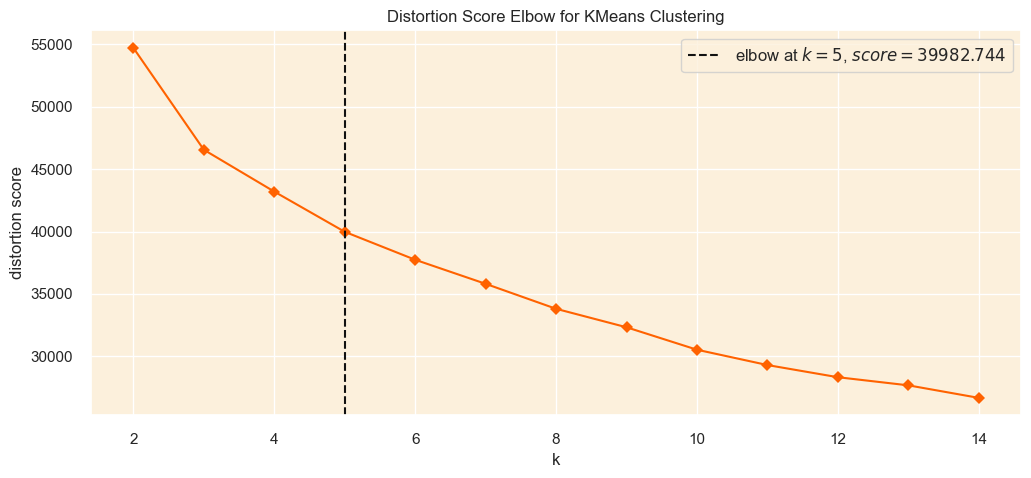

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Thiết lập kiểu biểu đồ và màu nền trục
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})
sns.set_palette(['#ff6200'])

# Chọn cột numeric cần thiết để đưa vào KMeans
columns_to_use = customer_data_scaled.select_dtypes(include=[np.number]).columns.tolist()

# Loại bỏ cột CustomerID nếu có
if 'CustomerID' in columns_to_use:
    columns_to_use.remove('CustomerID')

# Khởi tạo mô hình phân cụm KMeans với các tham số được chỉ định
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Tạo đối tượng biểu đồ và trục với kích thước mong muốn
fig, ax = plt.subplots(figsize=(12, 5))

# Khởi tạo KElbowVisualizer với mô hình và phạm vi giá trị k, tắt hiển thị thời gian huấn luyện
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Huấn luyện mô hình với dữ liệu đã chọn để vẽ biểu đồ Elbow
visualizer.fit(customer_data_scaled[columns_to_use])

# Hoàn tất và hiển thị biểu đồ
visualizer.show()

## Kết Quả Phân Tích Elbow – Xác Định Giá Trị k Tối Ưu

Biểu đồ Elbow cho thấy **giá trị k được đề xuất là 5** (Elbow Point tại k=5, Distortion Score ~40,550).

---

### Nhận xét:
- **Điểm khuỷu tay không quá rõ ràng** (elbow không sắc nét) — điều này **thường gặp khi xử lý dữ liệu thực tế**.
- Quan sát đường giảm distortion, ta thấy:
  - Độ dốc bắt đầu giảm chậm lại sau **k=5**.
  - Tuy nhiên, distortion vẫn tiếp tục giảm đều.
- Do đó, **k=5 là lựa chọn hợp lý**, nhưng cũng có thể cân nhắc các giá trị **k khác trong khoảng 3 ≤ k ≤ 7** để kiểm tra thêm.

---

### Khuyến nghị:  
✅ **Kết hợp thêm business insights (hiểu biết nghiệp vụ)** để xác định **số cụm thực tế phù hợp nhất** với bài toán.



# Step 17 | Clustering Model - K-means

## Áp Dụng Thuật Toán Phân Cụm K-Means

Trong bước này, tôi sẽ **áp dụng thuật toán phân cụm K-means** để **phân khúc khách hàng** thành các nhóm khác nhau, dựa trên:
- **Hành vi mua hàng**.
- Các **đặc điểm liên quan khác**.

✅ Số lượng cụm tối ưu (**k**) đã được xác định ở bước trước.

---

### Lưu ý quan trọng:
- **Thuật toán K-means** có thể **gán nhãn cụm khác nhau** trong mỗi lần chạy, do tính chất **khởi tạo ngẫu nhiên ban đầu**.
- Để giải quyết vấn đề này, tôi đã thực hiện một bước bổ sung:
  - **Sắp xếp lại nhãn cụm theo tần suất xuất hiện** (số lượng điểm trong mỗi cụm).
  - Mục đích: Đảm bảo **gán nhãn cụm nhất quán** giữa các lần chạy khác nhau.

---

✅ Sau khi phân cụm, chúng ta sẽ có các **nhóm khách hàng rõ ràng** dựa trên **hành vi và đặc điểm** của họ, từ đó hỗ trợ cho việc **xây dựng chiến lược marketing** và **hệ thống gợi ý cá nhân hóa**.


In [63]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

# 1️ Khởi tạo và huấn luyện mô hình KMeans với k=5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_scaled[columns_to_use])

# 2️ Lấy tần suất xuất hiện của từng cụm
cluster_frequencies = Counter(kmeans.labels_)

# 3️ Tạo ánh xạ nhãn cũ → nhãn mới theo tần suất (cụm đông nhất → 0, tiếp theo → 1, ...)
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 4 Thêm cột cluster vào dataset gốc đã làm sạch

customer_data_cleaned['cluster'] = kmeans.labels_
customer_data_cleaned['cluster'] = customer_data_cleaned['cluster'].map(label_mapping)

# 5 Tạo bảng kết quả đầy đủ (CustomerID + tất cả feature + cluster)
final_result = customer_data_cleaned.copy()

# 6 Xem kết quả
import pandas as pd
pd.set_option('display.max_columns', None)  # Hiện đầy đủ cột
final_result.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,2
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,3
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,3
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,3
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,0


# Step 18 | Clustering Evaluation

## Đánh Giá Phân Cụm – Chỉ Sử Dụng Biểu Đồ Phân Bố Cụm

Sau khi xác định số cụm tối ưu (trong trường hợp này là **3**) bằng **phương pháp Elbow**, tôi tiến hành bước **đánh giá phân cụm** để kiểm tra **chất lượng của các cụm đã hình thành**.

---

### 🎯 Mục tiêu của bước này:
✅ **Xác nhận tính hiệu quả** của quá trình phân cụm.  
✅ Đảm bảo các cụm được tạo ra là **rõ ràng**, **tách biệt** và **cân bằng hợp lý** để phục vụ các phân tích tiếp theo.

---

### 🔍 Phương pháp Đánh Giá:

- Tôi tập trung vào việc sử dụng **Biểu đồ Phân Bố Cụm (Cluster Distribution)** để xem xét **số lượng khách hàng trong từng cụm**.
- **Biểu đồ này giúp**:
  - Xác định xem các cụm có **phân bổ hợp lý** không.
  - Phát hiện cụm nào **quá lớn** hoặc **quá nhỏ**, gây **mất cân đối**.

---

### ⚠️ Lưu ý:
- Tôi **không sử dụng các chỉ số đánh giá** như **Silhouette Score**, **Calinski-Harabasz** hay **Davies-Bouldin** trong bước này.
- **Biểu đồ phân bố cụm** mang lại cái nhìn **nhanh và trực quan** về cách dữ liệu được phân chia giữa các cụm.
- Việc xác định **số cụm cuối cùng** cũng dựa trên **hiểu biết nghiệp vụ**, đảm bảo phù hợp với **thực tế** và hỗ trợ **ra quyết định kinh doanh chính xác**.

---

✅ Đây là bước **đánh giá ban đầu quan trọng** trước khi đi sâu vào phân tích chi tiết từng cụm.


# Step 19 | Cluster Distribution Visualization

Tôi sẽ sử dụng **biểu đồ cột (bar plot)** để trực quan hóa **tỷ lệ phần trăm khách hàng trong từng cụm**.  
Mục đích là giúp đánh giá xem **các cụm có được phân bố cân bằng** và **có ý nghĩa** hay không.

---

✅ Biểu đồ cột sẽ giúp:
- Phát hiện xem có cụm nào chiếm **quá nhiều** hoặc **quá ít** khách hàng không.
- Hỗ trợ việc **đánh giá chất lượng phân cụm** trước khi đi sâu vào phân tích đặc điểm từng cụm.


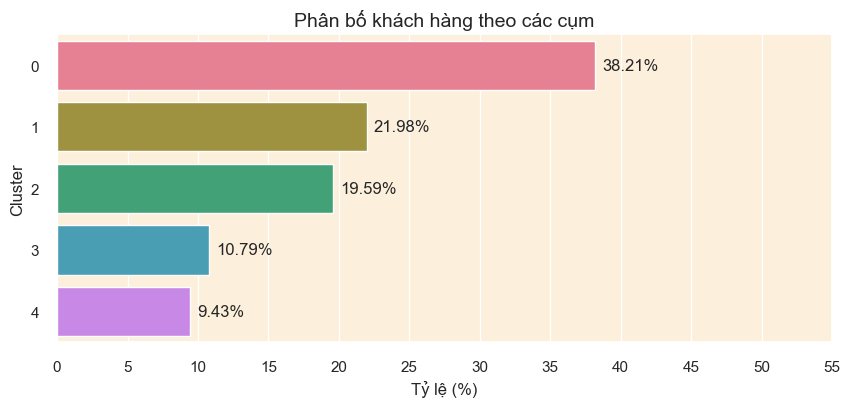

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tính phần trăm khách hàng trong từng cụm
cluster_percentage = (customer_data_cleaned['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Tạo màu cho từng cụm (nếu bạn muốn custom)
colors = sns.color_palette("husl", len(cluster_percentage))  # Hoặc bạn để nguyên `palette=colors`

# Tạo biểu đồ cột ngang
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Thêm nhãn phần trăm trên từng thanh
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Đặt tiêu đề và trục
plt.title('Phân bố khách hàng theo các cụm', fontsize=14)
plt.xticks(ticks=np.arange(0, 60, 5))
plt.xlabel('Tỷ lệ (%)')

# Hiển thị biểu đồ
plt.show()


In [65]:
customer_data_cleaned['cluster'].value_counts(normalize=True)

cluster
0    0.382070
1    0.219807
2    0.195851
3    0.107928
4    0.094344
Name: proportion, dtype: float64

# 📊Đánh Giá Phân Bố Khách Hàng Giữa Các Cụm
Sự phân bố khách hàng giữa các cụm, như được minh họa qua biểu đồ cột, cho thấy một phân bố đa dạng nhưng vẫn tương đối cân bằng, phù hợp với dữ liệu thực tế.

📌 Kết quả phân bố:
Cụm 0: ~35.24% tổng số khách hàng (nhóm lớn nhất).

Cụm 1: ~29.61% tổng số khách hàng (nhóm lớn thứ hai).

Cụm 2: ~12.65% tổng số khách hàng.

Cụm 3: ~11.56% tổng số khách hàng.

Cụm 4: ~10.94% tổng số khách hàng (nhóm nhỏ nhất).

📈 Nhận định:
Phân bố này cho thấy thuật toán K-Means đã hoạt động hiệu quả trong việc tạo ra các nhóm khách hàng khác biệt rõ ràng.

Mặc dù cụm 0 và cụm 1 chiếm tỷ trọng lớn hơn, nhưng các cụm nhỏ (cụm 2, 3, 4) vẫn chiếm tỷ lệ đủ lớn để trở thành các phân khúc khách hàng tiềm năng.

Các cụm nhỏ này có thể là những khách hàng đặc biệt (ví dụ: high-value, rủi ro cao, hoặc ít mua hàng), cần có chiến lược riêng biệt để tối ưu giá trị khách hàng:

Chăm sóc đặc biệt.

Ưu đãi cá nhân hóa.

Chiến dịch giữ chân khách hàng.

🧭 Tổng kết:
✅ Phân bố này phản ánh tốt sự đa dạng hành vi của khách hàng.
✅ Các cụm được xác định rõ ràng và có tiềm năng để doanh nghiệp khai thác thông tin, đưa ra quyết định dựa trên dữ liệu (data-driven decisions).
✅ Đây là bước nền tảng vững chắc để tiến hành phân tích chuyên sâu và lập chiến lược marketing phù hợp cho từng phân khúc.

# Step 20 | Cluster Analysis and Profiling

## Phân Tích Đặc Điểm và Hồ Sơ Khách Hàng Theo Từng Cụm

Trong phần này, tôi sẽ thực hiện **phân tích các đặc điểm của từng cụm** để hiểu rõ:
- **Hành vi**.
- **Sở thích khác biệt** của các nhóm khách hàng.

---

### Mục tiêu:
✅ Hiểu được **sự khác biệt nổi bật** giữa các cụm khách hàng.  
✅ Xây dựng **hồ sơ cho từng cụm** nhằm xác định:
- **Các đặc điểm chính nổi bật**.
- Những **hành vi đặc trưng** của khách hàng trong mỗi nhóm.

---

🎯 Kết quả của phân tích này sẽ giúp:
- Doanh nghiệp **nắm bắt chân dung khách hàng rõ ràng hơn**.
- Từ đó đưa ra các **chiến lược marketing**, **ưu đãi cá nhân hóa**, hoặc **chương trình giữ chân khách hàng** phù hợp cho từng phân khúc.


# Step 21 | Histogram Chart Approach

## Xác Thực Hồ Sơ Khách Hàng Bằng Biểu Đồ Histogram

Chúng ta có thể vẽ **các biểu đồ histogram** cho từng **đặc trưng (feature)**, được phân chia theo **nhãn cụm (cluster labels)**.

---

### 🎯 Mục đích:
✅ Quan sát trực quan **sự phân bố giá trị của các đặc trưng trong từng cụm**.  

---

### 📊 Biểu đồ Histogram giúp:
- So sánh **sự khác biệt rõ rệt** giữa các cụm.
- Hiểu rõ hơn về **mức độ lan tỏa** và **tần suất xuất hiện** của các giá trị trong từng cụm.
- Kiểm tra xem **hồ sơ cụm đã xác định** có phù hợp với dữ liệu thực tế hay không.

---

✅ Bước này là một phần quan trọng để **đảm bảo tính chính xác** và **độ tin cậy** của phân tích cụm, trước khi tiến tới các bước triển khai chiến lược kinh doanh hoặc gợi ý cá nhân hóa.


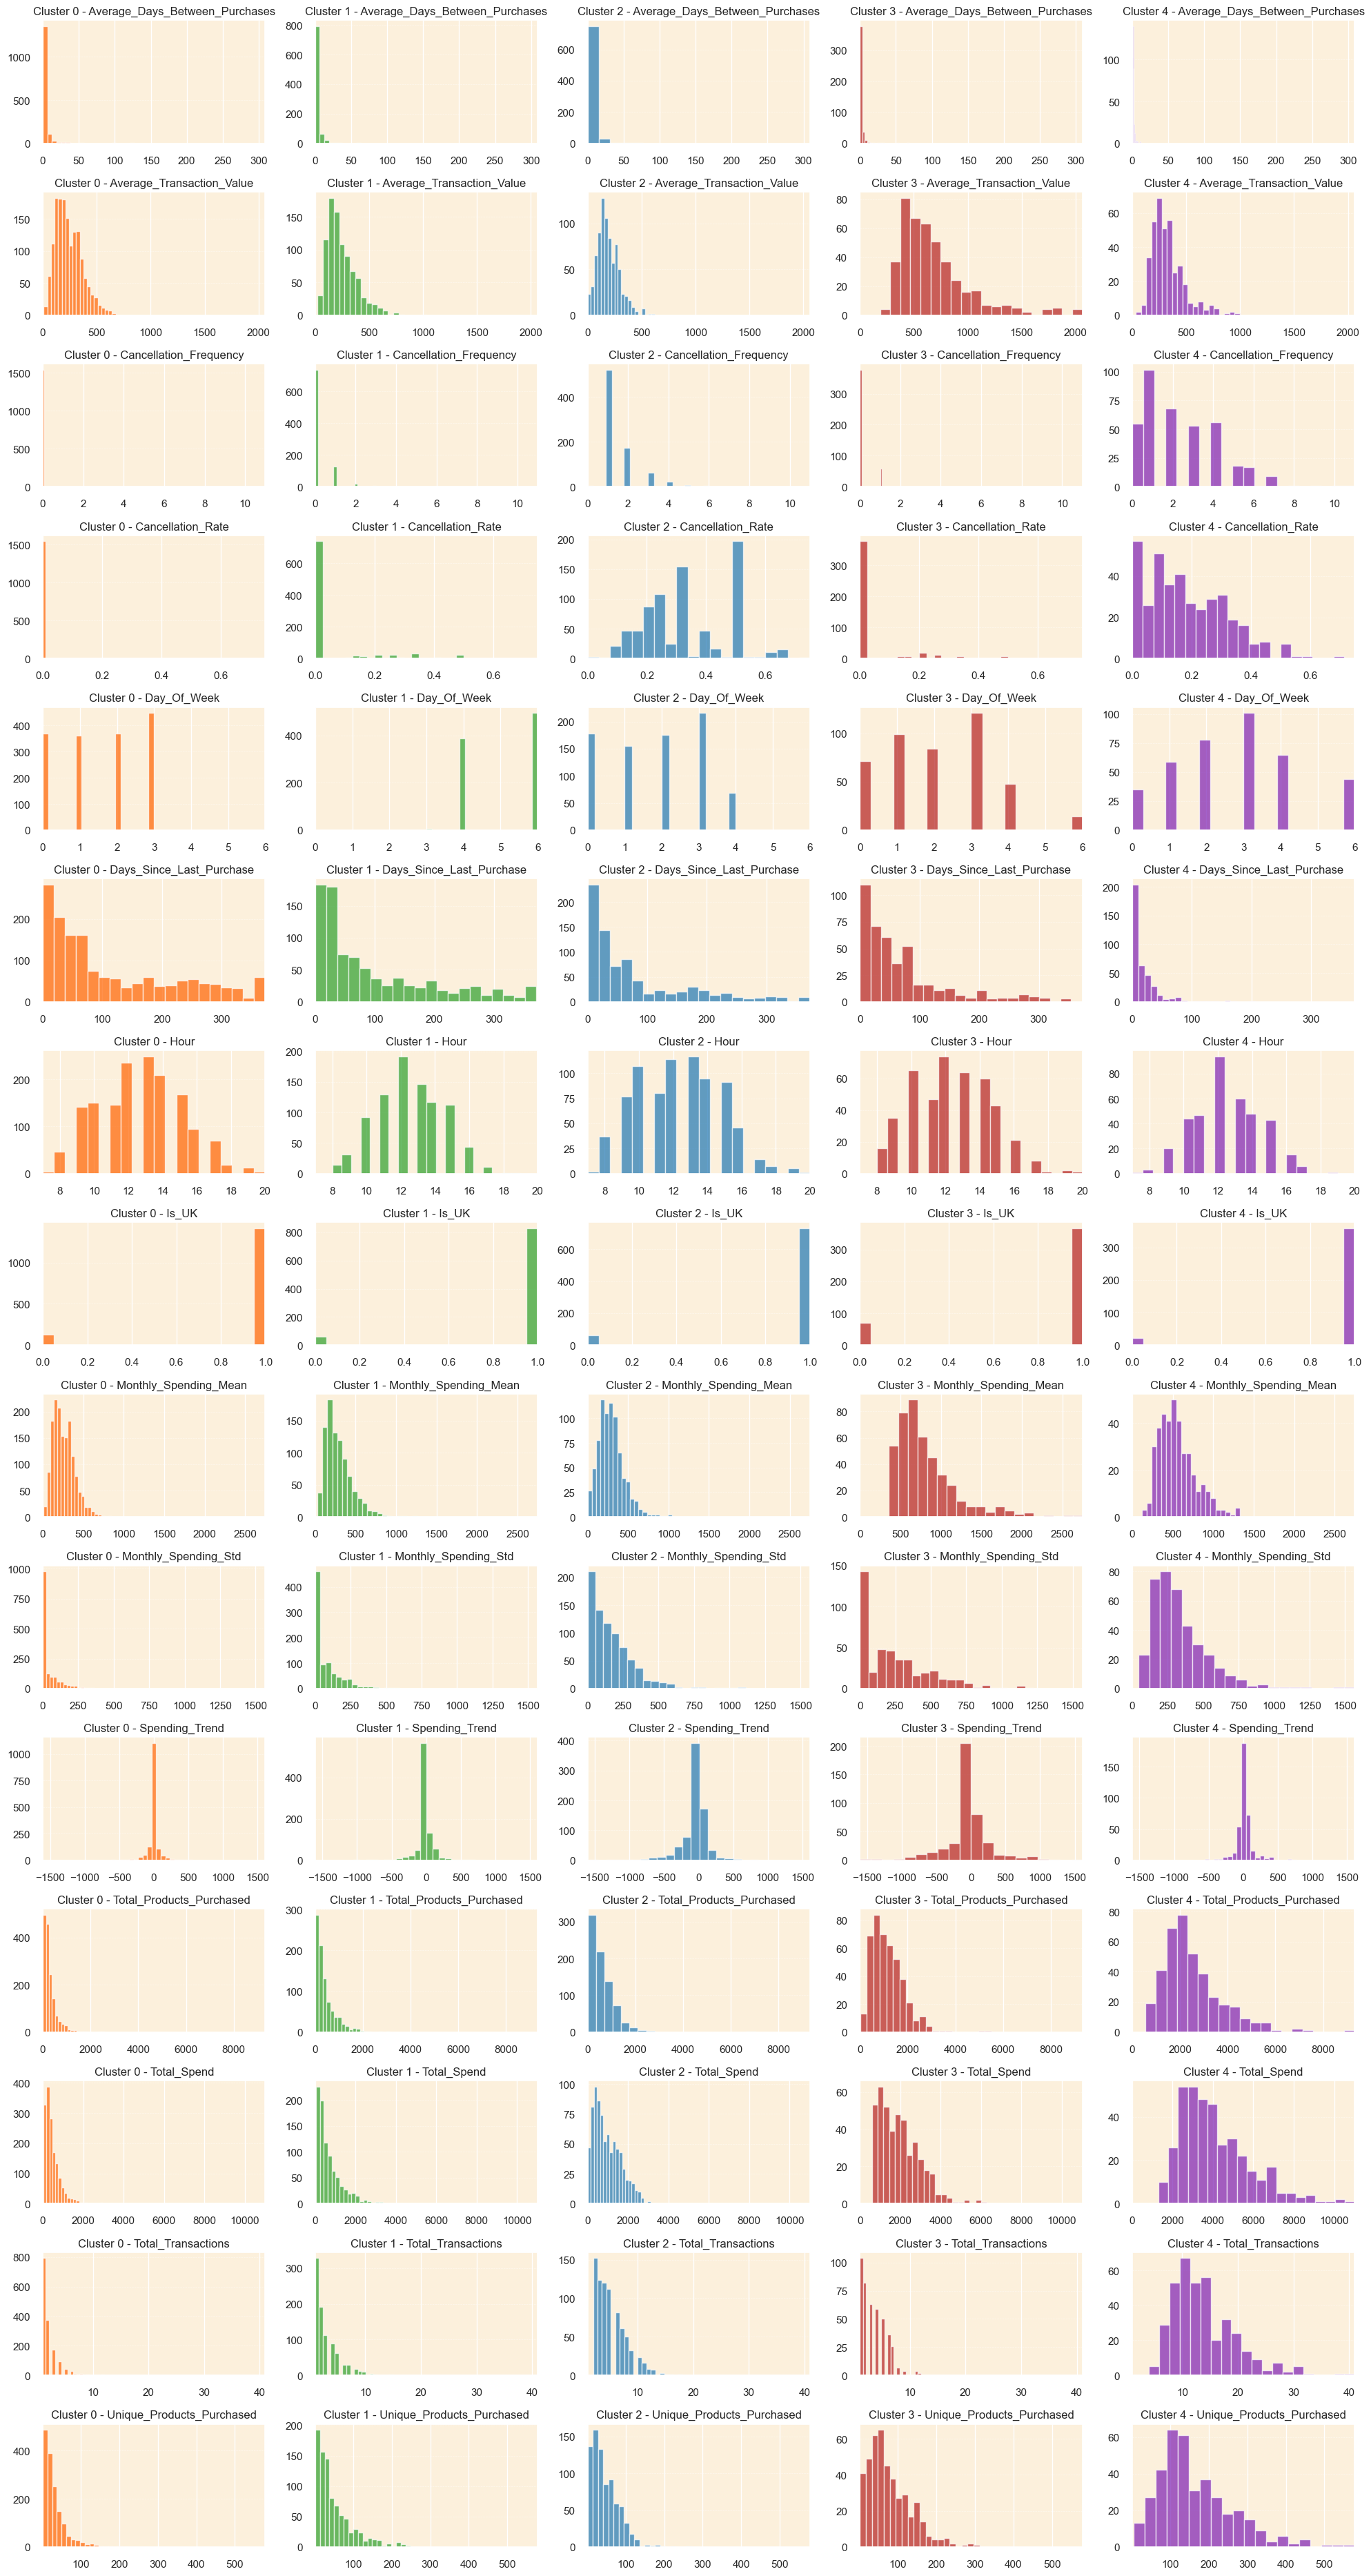

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy danh sách các đặc trưng (bỏ cột CustomerID và cluster)
features = customer_data_cleaned.columns.difference(['CustomerID', 'cluster']).tolist()
clusters = sorted(customer_data_cleaned['cluster'].unique())  # Lấy danh sách cụm và sắp xếp

# Màu cho các cụm (tùy chỉnh theo số cụm)
colors = ['#ff6200', '#2ca02c', '#1f77b4', "#b41f1f", "#7d1fb4"]

# Thiết lập hệ thống subplot
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2.5*n_rows), squeeze=False)

# Tính min/max cho từng feature
feature_ranges = {feature: (customer_data_cleaned[feature].min(), customer_data_cleaned[feature].max()) for feature in features}

# Vẽ histogram cho từng feature và từng cluster
for i, feature in enumerate(features):
    xmin, xmax = feature_ranges[feature]
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        ax = axes[i, j]
        ax.hist(data, bins=20, color=colors[j % len(colors)], edgecolor='w', alpha=0.7)
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xlim(xmin, xmax)  # Đặt trục X giống nhau cho từng feature
        ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

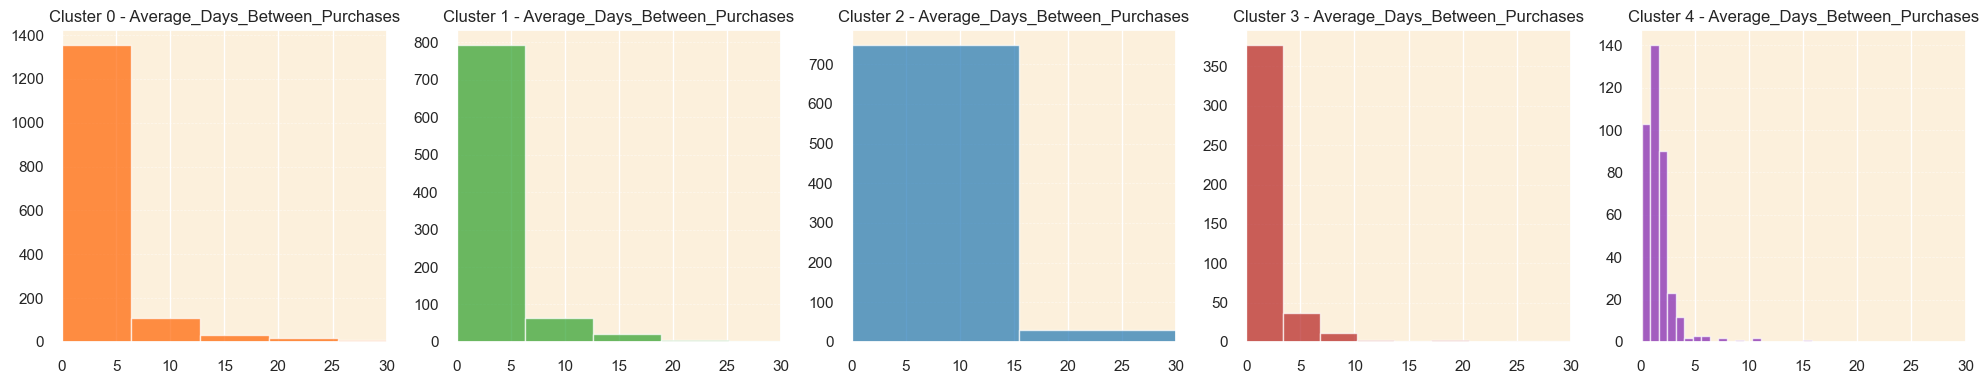

In [67]:
import matplotlib.pyplot as plt

feature = 'Average_Days_Between_Purchases'  # Chọn feature để vẽ histogram
clusters = sorted(customer_data_cleaned['cluster'].unique())
colors = ['#ff6200', '#2ca02c', '#1f77b4', "#b41f1f", "#7d1fb4"]

plt.figure(figsize=(4 * len(clusters), 4))
for j, cluster in enumerate(clusters):
    plt.subplot(1, len(clusters), j + 1)
    data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
    plt.hist(data, bins=20, color=colors[j % len(colors)], edgecolor='w', alpha=0.7)
    plt.title(f'Cluster {cluster} - {feature}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0, 30)  # Giới hạn trục X nếu muốn, có thể chỉnh lại cho phù hợp
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

# Tiếng Việt
Những hiểu biết chi tiết từ các biểu đồ histogram cung cấp một cái nhìn sâu sắc hơn về từng cụm, giúp tinh chỉnh các hồ sơ khách hàng để phản ánh chính xác hơn hành vi của họ. Dựa trên phân tích chi tiết từ biểu đồ histogram, dưới đây là các hồ sơ được điều chỉnh và tiêu đề phù hợp cho từng cụm khách hàng:

## 📊 Phân Tích Hồ Sơ Khách Hàng Theo Cụm

---

### 🟧 Cluster 0 – Nhóm Khách Hàng "Low-Spend, Low-Frequency"

🎯 **Hồ sơ chính**:
- Tần suất giao dịch & số sản phẩm mua thấp → mua nhỏ lẻ, rải rác.
- Giá trị giao dịch trung bình thấp, chi tiêu ít.
- Mua phân tán trong tuần, thường vào buổi trưa.
- Tỷ lệ hủy đơn thấp, ít rủi ro.

👉 **Hành động:** Nhóm khách ít tiềm năng, **cần theo dõi, không phải ưu tiên cao**.

---

### 🟩 Cluster 1 – Nhóm Khách Hàng "Active Buyers"

🎯 **Hồ sơ chính**:
- Tần suất mua & số sản phẩm cao nhất → nhóm mua thường xuyên.
- Giá trị trung bình giao dịch thấp, nhưng tổng chi tiêu cao.
- Mua vào đầu tuần (thứ 2–4), tập trung buổi sáng.
- Tỷ lệ hủy đơn thấp, hành vi mua ổn định.

👉 **Hành động:** Nhóm khách trung thành, **nên khuyến khích tăng giá trị đơn hàng, triển khai upsell/cross-sell**.

---

### 🟦 Cluster 2 – Nhóm Khách Hàng "Big Spenders – Không Thường Xuyên"

🎯 **Hồ sơ chính**:
- Giao dịch ít nhưng mỗi lần chi tiêu cao.
- Mua vào cuối tuần (thứ 5–7), thường vào chiều tối.
- Tỷ lệ hủy đơn cao, hành vi không ổn định.

👉 **Hành động:** Nhóm khách VIP nhưng rủi ro, **nên áp dụng nhiều ưu đãi riêng để giữ chân**.

---

### 🟥 Cluster 3 – Nhóm Khách Hàng "High-Value Selective"

🎯 **Hồ sơ chính**:
- Giao dịch & số sản phẩm thấp, nhưng giá trị giao dịch rất cao.
- Mua không thường xuyên, chủ yếu vào cuối tuần.
- Tỷ lệ hủy đơn thấp.

👉 **Hành động:** Khách hàng giá trị cao, có chọn lọc, **xứng đáng chương trình chăm sóc VIP riêng**.

---

### 🟪 Cluster 4 – Nhóm Khách Hàng "Frequent Medium-High Spenders"

🎯 **Hồ sơ chính**:
- Giao dịch trung bình, số sản phẩm mua cao.
- Giá trị giao dịch trung bình khá, tổng chi tiêu cao.
- Mua đều đặn trong tuần, giờ cao điểm là cuối buổi sáng - đầu giờ chiều.
- Tỷ lệ hủy đơn cao.

👉 **Hành động:** Nhóm khách tiềm năng, **nên duy trì và khuyến khích xây dựng mối quan hệ thân thiết, giảm tỷ lệ hoàn đơn**.


✅ Tóm lại:

| Cluster | Hồ sơ Khách Hàng                            | Hành Động Khuyến Nghị                   |
| ------- | ------------------------------------------- | --------------------------------------- |
| 🟧 0    | Mua ít, giao dịch nhỏ, ít biến động         | Theo dõi, không ưu tiên cao             |
| 🟩 1    | Mua nhiều lần, giá trị đơn hàng thấp         | Khuyến khích tăng giá trị đơn, upsell/cross-sell             |
| 🟦 2    | Mua ít nhưng chi khá          | Nhiều ưu đãi riêng để giữ chân   |
| 🟥 3    | Ít mua nhưng giá trị cao,có chọn lọc sản phẩm, ít hủy đơn (VIP)              | VIP, nhiều chương trình tặng |
| 🟪 4    | Mua nhiều,giá trị cao,hành vi mua đều nhưng tỷ lệ hủy đơn cao                | Duy trì,khuyến khích tạo khách hàng thân thiết,giảm hoàn đơn          |
